### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

from sklearn.metrics import precision_score, recall_score

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

## Loading the datasets

### Loading the TheGeneral dataset

In [3]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)

In [4]:
df_TheGeneral.head()

AbilitecContactID  PolicyNumber  DriverNumber AbilitecHouseholdID  \
0  04ZJUS02EXPR09CB  Q080MDE1MTY2             1    04ZJUS0300X496LW   
1  04ZJUS0146KL4TTS  Q080MDEwOTEx             1    04ZJUS035SBF0GJ4   
2  04ZJUS02K2KC7DMW  Q080MDExOTIz             1    04ZJUS035ZXBZEH1   
3  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
4  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   

   DriverCount  ClaimCount  TotalPaid   ClaimNumber AtFaultDescription  \
0            4           1    5086.61  PA0002364104           No fault   
1            2           1       0.00  PA0002351705   Insured at fault   
2            2           1   21397.74  PA0002344011   Insured at fault   
3            5           3       0.00  PA0002348918           No fault   
4            5           3       0.00  PA0002348997           No fault   

  ClaimStatus                 ClaimType           DateOfLoss  DriverID  \
0           C                      HAIL  2018-08-06 00:00:00        98   
1           C            PG_IVREARENDCV  2018-05-24 00:00:00         1   
2           C  PG_COLLISIONINTERSECTION  2018-06-17 00:00:00         1   
3           C                      HAIL  2018-06-19 00:00:00        98   
4           C             GLASSBREAKAGE  2018-06-30 00:00:00         1   

  LossState PolicyStateCode SubrogrationFlag    TermEffectiveDate  VehicleID  \
0        CO              CO               NO  2018-05-29 00:00:00          1   
1        CO              CO               NO  2018-05-24 00:00:00          1   
2        CO              CO               NO  2018-05-25 00:00:00          1   
3        CO              CO              YES  2018-06-01 00:00:00          2   
4        CO              CO               NO  2018-06-01 00:00:00          2   

   ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  DaysToClaim_h  
0              9.0             5086.61          0.0            0.0  
1              4.0                0.00          0.0            0.0  
2             53.0            21397.74          0.0            0.0  
3             14.0                0.00          0.0            0.0  
4              1.0                0.00          0.0            0.0

In [5]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

### Loading the MasterQuote dataset

In [6]:
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

In [7]:
df_MasterQuote.head()

QuoteNumber  MQuotedTotalPayment BiFcCoverageInd CoverageTypeDescription  \
0  MzM0MDA0OTE=               1136.0         BI NOFC          Liability Only   
1  MzM0MDQxNzU=                  0.0       NOBI NOFC          Liability Only   
2  MzM0MTc2MTk=               1160.0         BI NOFC          Liability Only   
3  MzM0MTk3MjQ=               3054.0           BI FC           Full Coverage   
4  MzM0MjAxMjU=                  0.0       NOBI NOFC          Liability Only   

   DriversActive GaragingState NamedInsuredMaritalStatus  PolicyNumber  \
0              1            OR                    Single  T1IyNzE0OTQ0   
1              1            IL                  Divorced           NaN   
2              2            NV                   Married  TlYyNzE2MTE5   
3              2            RI                   Married  UkkyNzQ3ODg1   
4              1            OH                    Single           NaN   

  PolicyStateCode  PolicyTerm   QuoteInitiatedTime    TermEffectiveDate  \
0              OR          12  2016-01-02 22:25:47  2016-01-02 00:00:00   
1              IL          12  2016-01-03 12:15:55  2016-01-03 00:00:00   
2              NV          12  2016-01-04 11:10:58  2016-01-04 00:00:00   
3              RI          12  2016-01-04 12:09:06  2016-01-26 00:00:00   
4              OH          12  2016-01-04 12:20:07  2016-01-04 00:00:00   

    TermExpirationDate AbilitecContactID  DriverNumber AbilitecHouseholdID  \
0  2017-01-02 00:00:00  04ZJUS0220X4MKG7             1    04ZJUS033FV1YJP0   
1  2017-01-03 00:00:00  04ZJUS02W4N0B2J5             1    04ZJUS03543132P3   
2  2017-01-04 00:00:00  04ZJUS01KNTMYEQF             1    04ZJUS03X6MXZ21T   
3  2017-01-26 00:00:00  04ZJUS02XQ1DGSDW             2    04ZJUS03ZDK4PGRF   
4  2017-01-04 00:00:00  04ZJUS023RYMYKKP             1    04ZJUS036201CX3G   

   DriverCount  
0            1  
1            1  
2            2  
3            1  
4            1

# MasterQuote dataset - can we predict how much a customer's payment will be based on a variety of factors?

## Numerical Variable exploration

In [8]:
df_MasterQuote.describe()

MQuotedTotalPayment  DriversActive    PolicyTerm  DriverNumber  \
count         34975.000000   34975.000000  34975.000000  34975.000000   
mean           1554.266786       1.300758      9.799514      1.042831   
std            1232.290357       0.552171      2.891542      0.243509   
min               0.000000       1.000000      6.000000      1.000000   
25%             789.875000       1.000000      6.000000      1.000000   
50%            1260.000000       1.000000     12.000000      1.000000   
75%            2015.920000       2.000000     12.000000      1.000000   
max           18803.000000       6.000000     12.000000      6.000000   

        DriverCount  
count  34975.000000  
mean       1.747219  
std        1.214019  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       15.000000

In [9]:
df_MasterQuote['DriverNumber'].value_counts()

1    33732
2     1041
3      159
4       35
5        6
6        2
Name: DriverNumber, dtype: int64

In [10]:
df_MasterQuote['DriversActive'].value_counts()

1    25860
2     7935
3      981
4      175
5       23
6        1
Name: DriversActive, dtype: int64

In [11]:
df_MasterQuote['DriverCount'].value_counts()

1     20273
2      8987
3      2556
4      1922
5       604
6       315
7       148
8        71
9        49
10       20
11       16
12       10
13        2
14        1
15        1
Name: DriverCount, dtype: int64

<AxesSubplot:xlabel='DriverCount', ylabel='count'>

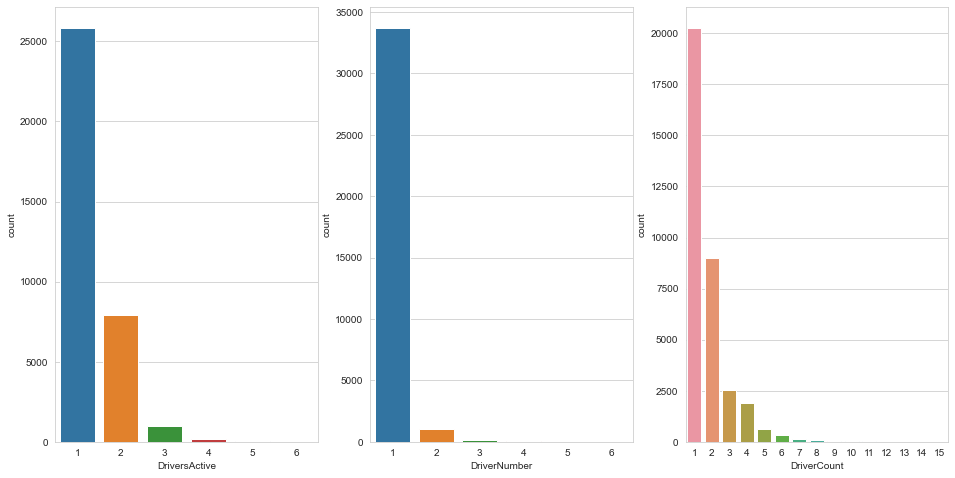

In [12]:
plt.figure(figsize = (16,8))
plt.subplot(131)
sns.countplot(data=df_MasterQuote, x='DriversActive')
plt.subplot(132)
sns.countplot(data=df_MasterQuote, x='DriverNumber')
plt.subplot(133)
sns.countplot(data=df_MasterQuote, x='DriverCount')

<AxesSubplot:xlabel='PolicyTerm', ylabel='count'>

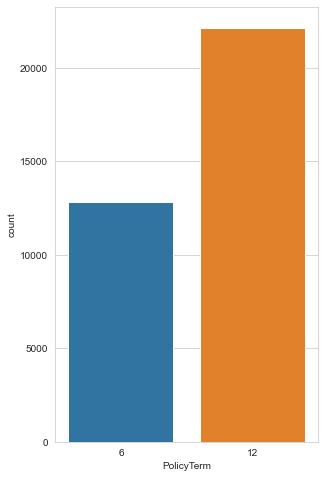

In [13]:
plt.figure(figsize = (16,8))
plt.subplot(133)
sns.countplot(data=df_MasterQuote, x='PolicyTerm')

* Preliminary Analysis of the numerical variables is confusing at best. While QuotedTotalPayment will be our response variable, and PolicyTerm will be helpful in us determining whether the length of the policy has an effect on the quote, the other 3 variables appear to be closely related, but confusing to understand. Let's do a correlation plot to determine if they are highly correlated, so we can then drop one or more.

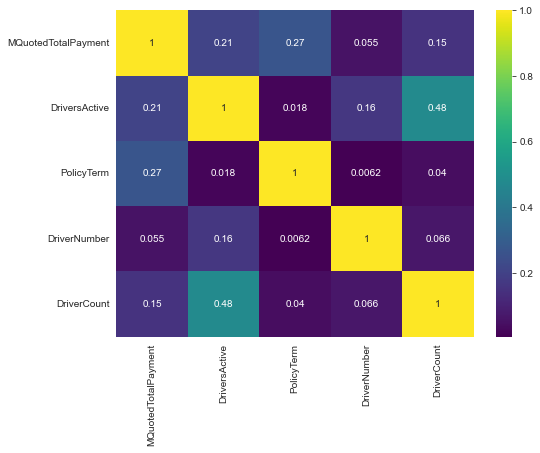

In [14]:
fig = plt.figure(figsize= (8,6))
sns.heatmap(df_MasterQuote.corr(), cmap="viridis", annot=True)
plt.show()

* Surprisingly even though the driver statistics appear linked, they don't seem overly correlated. We'll keep for now.

## Categorical Variable exploration

In [15]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

In [16]:
df_MasterQuote['PolicyNumber'].value_counts()

T1IyNzE0OTQ0    1
Q080MTM1MTM0    1
Rkw0MTUzNDcz    1
REM0MTM1MDk4    1
VE40MTM1MDAz    1
               ..
VE4zOTA4OTU5    1
Q0EzOTA4OTA0    1
V1IzOTA4NzMz    1
VVQzOTEyNTg2    1
T0s0NTI4MzMz    1
Name: PolicyNumber, Length: 21113, dtype: int64

In [17]:
df_MasterQuote.duplicated(subset=['PolicyNumber']).value_counts()

False    21114
True     13861
dtype: int64

In [18]:
df_MasterQuote.duplicated(subset=['QuoteNumber']).value_counts()

False    34975
dtype: int64

* Making sure there are no duplicates for Policy number and Quote Number. If there are none, then there's no reason to keep these as they won't provide helpful info for regression analysis.

* Categoricals to remove:

QuoteNumber
PolicyNumber
QuoteInitiatedTime
TermEffectiveDate
TermExpirationDate
AbilitecContactID
AbilitecHouseholdID

* All of the above are fairly low impact or will not be helpful in regression analysis

* Deleting of initial Columns

In [19]:
df_MasterQuote = df_MasterQuote.drop(['QuoteNumber', 'PolicyNumber', 'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate','AbilitecContactID', 'AbilitecHouseholdID' ], axis = 1)

In [20]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MQuotedTotalPayment        34975 non-null  float64
 1   BiFcCoverageInd            34975 non-null  object 
 2   CoverageTypeDescription    34975 non-null  object 
 3   DriversActive              34975 non-null  int64  
 4   GaragingState              34975 non-null  object 
 5   NamedInsuredMaritalStatus  34975 non-null  object 
 6   PolicyStateCode            34975 non-null  object 
 7   PolicyTerm                 34975 non-null  int64  
 8   DriverNumber               34975 non-null  int64  
 9   DriverCount                34975 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.7+ MB


## Dummy Exploration and building

In [21]:
df_MasterQuote['BiFcCoverageInd'].value_counts()

BI NOFC      18580
BI FC        13417
NOBI NOFC     2682
NOBI FC        296
Name: BiFcCoverageInd, dtype: int64

In [22]:
df_MasterQuote['NamedInsuredMaritalStatus'].value_counts()

Single              20366
Married              8489
Divorced             3668
Separated            1721
Widowed               719
Domestic Partner        7
Civil Union             5
Name: NamedInsuredMaritalStatus, dtype: int64

In [23]:
df_MasterQuote['CoverageTypeDescription'].value_counts()

Liability Only    21016
Full Coverage     13713
Bond                246
Name: CoverageTypeDescription, dtype: int64

<AxesSubplot:xlabel='CoverageTypeDescription', ylabel='count'>

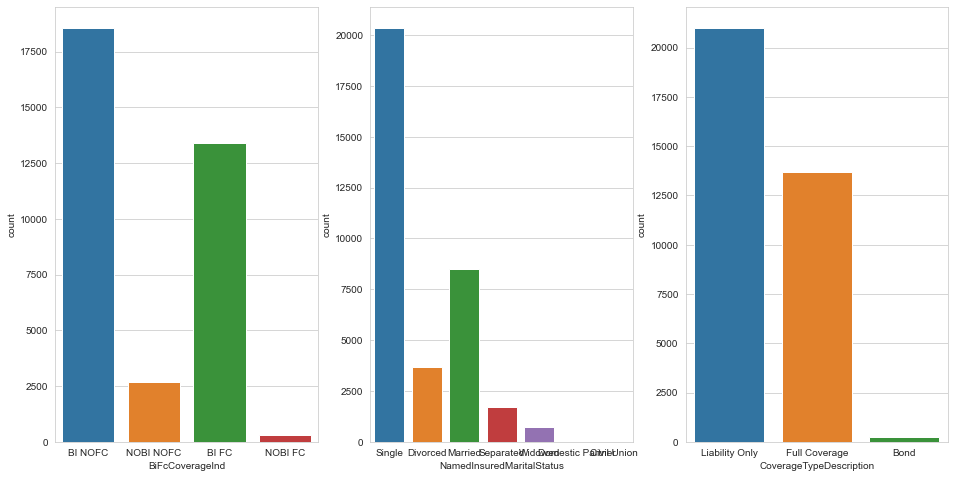

In [24]:
plt.figure(figsize = (16,8))
plt.subplot(131)
sns.countplot(data=df_MasterQuote, x='BiFcCoverageInd')
plt.subplot(132)
sns.countplot(data=df_MasterQuote, x='NamedInsuredMaritalStatus')
plt.subplot(133)
sns.countplot(data=df_MasterQuote, x='CoverageTypeDescription')

* We'll want dummies for BiFcCoverage, Marital status and CoverageTypeDescription. All 3 variables appear to have some distinct spreads that make them well to run regression on after turning to dummies. Domestic Partner and Civil Union for Marital Status have too few values to be of substanstial help, so we will remove those rows.

In [25]:
#Removing Domestic Partner Rows
df_MasterQuote = df_MasterQuote[df_MasterQuote.NamedInsuredMaritalStatus != 'Domestic Partner']

In [26]:
#Removing Civil Union Rows
df_MasterQuote = df_MasterQuote[df_MasterQuote.NamedInsuredMaritalStatus != 'Civil Union']

In [27]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 34974
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MQuotedTotalPayment        34963 non-null  float64
 1   BiFcCoverageInd            34963 non-null  object 
 2   CoverageTypeDescription    34963 non-null  object 
 3   DriversActive              34963 non-null  int64  
 4   GaragingState              34963 non-null  object 
 5   NamedInsuredMaritalStatus  34963 non-null  object 
 6   PolicyStateCode            34963 non-null  object 
 7   PolicyTerm                 34963 non-null  int64  
 8   DriverNumber               34963 non-null  int64  
 9   DriverCount                34963 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.9+ MB


In [28]:
#create dummies
dummies = pd.get_dummies(df_MasterQuote[['BiFcCoverageInd', 'NamedInsuredMaritalStatus', 'CoverageTypeDescription']]) 
dummies.head()

BiFcCoverageInd_BI FC  BiFcCoverageInd_BI NOFC  BiFcCoverageInd_NOBI FC  \
0                      0                        1                        0   
1                      0                        0                        0   
2                      0                        1                        0   
3                      1                        0                        0   
4                      0                        0                        0   

   BiFcCoverageInd_NOBI NOFC  NamedInsuredMaritalStatus_Divorced  \
0                          0                                   0   
1                          1                                   1   
2                          0                                   0   
3                          0                                   0   
4                          1                                   0   

   NamedInsuredMaritalStatus_Married  NamedInsuredMaritalStatus_Separated  \
0                                  0                                    0   
1                                  0                                    0   
2                                  1                                    0   
3                                  1                                    0   
4                                  0                                    0   

   NamedInsuredMaritalStatus_Single  NamedInsuredMaritalStatus_Widowed  \
0                                 1                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 1                                  0   

   CoverageTypeDescription_Bond  CoverageTypeDescription_Full Coverage  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      1   
4                             0                                      0   

   CoverageTypeDescription_Liability Only  
0                                       1  
1                                       1  
2                                       1  
3                                       0  
4                                       1

In [29]:
# Merge dummies in
df_MasterQuote = pd.concat([df_MasterQuote, dummies[['BiFcCoverageInd_BI FC', 'BiFcCoverageInd_BI NOFC', 'BiFcCoverageInd_NOBI FC', 'BiFcCoverageInd_NOBI NOFC', 'NamedInsuredMaritalStatus_Divorced', 
                                         'NamedInsuredMaritalStatus_Married', 'NamedInsuredMaritalStatus_Separated', 'NamedInsuredMaritalStatus_Single', 'NamedInsuredMaritalStatus_Widowed', 
                                         'CoverageTypeDescription_Bond', 'CoverageTypeDescription_Full Coverage', 'CoverageTypeDescription_Liability Only']]], axis = 1)
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 34974
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MQuotedTotalPayment                     34963 non-null  float64
 1   BiFcCoverageInd                         34963 non-null  object 
 2   CoverageTypeDescription                 34963 non-null  object 
 3   DriversActive                           34963 non-null  int64  
 4   GaragingState                           34963 non-null  object 
 5   NamedInsuredMaritalStatus               34963 non-null  object 
 6   PolicyStateCode                         34963 non-null  object 
 7   PolicyTerm                              34963 non-null  int64  
 8   DriverNumber                            34963 non-null  int64  
 9   DriverCount                             34963 non-null  int64  
 10  BiFcCoverageInd_BI FC                   34963 non-null  ui

In [30]:
#Removing non-dummy columns
df_MasterQuote = df_MasterQuote.drop(['BiFcCoverageInd', 'CoverageTypeDescription', 'NamedInsuredMaritalStatus'], axis = 1)

In [31]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 34974
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MQuotedTotalPayment                     34963 non-null  float64
 1   DriversActive                           34963 non-null  int64  
 2   GaragingState                           34963 non-null  object 
 3   PolicyStateCode                         34963 non-null  object 
 4   PolicyTerm                              34963 non-null  int64  
 5   DriverNumber                            34963 non-null  int64  
 6   DriverCount                             34963 non-null  int64  
 7   BiFcCoverageInd_BI FC                   34963 non-null  uint8  
 8   BiFcCoverageInd_BI NOFC                 34963 non-null  uint8  
 9   BiFcCoverageInd_NOBI FC                 34963 non-null  uint8  
 10  BiFcCoverageInd_NOBI NOFC               34963 non-null  ui

## Label Encoding

In [32]:
df_MasterQuote['GaragingState'].value_counts()

OH    2525
TN    2026
FL    1932
CO    1850
PA    1803
GA    1449
IN    1295
AZ    1255
CA    1133
TX    1083
AL    1010
VA     904
NC     867
WA     674
MN     640
WI     638
DC     606
SC     604
KY     599
IL     593
AR     561
UT     546
MO     523
ID     513
DE     491
VT     487
MD     460
ME     452
WV     451
OK     451
NH     449
LA     448
NE     443
CT     441
KS     437
ND     415
OR     415
MS     409
NM     405
IA     400
NY     395
WY     391
SD     389
MT     380
AK     305
NV     280
RI     140
Name: GaragingState, dtype: int64

In [33]:
df_MasterQuote['GaragingState'].equals(df_MasterQuote['PolicyStateCode'])

True

* GaragingState and PolicyStateCode are duplicated columns, so we can remove GaragingState. PolicyStateCode will need a label encoder transformation (and an inverse transformation afterwards)

In [34]:
df_MasterQuote = df_MasterQuote.drop(['GaragingState'], axis = 1)

In [35]:
#Assigning numerica values to PolicyStateCode via label encoder transfrom. 

label_object = {}
categorical_columns = ['PolicyStateCode']
for col in categorical_columns:
    lc.fit(df_MasterQuote[col])
    df_MasterQuote[col] = lc.fit_transform(df_MasterQuote[col])
    label_object[col] = lc

label_object['PolicyStateCode'].inverse_transform(df_MasterQuote['PolicyStateCode']) 

array(['OR', 'IL', 'NV', ..., 'OK', 'KS', 'NC'], dtype=object)

In [36]:
df_MasterQuote['PolicyStateCode']

0        33
1        13
2        29
3        35
4        31
         ..
34970    20
34971    10
34972    32
34973    15
34974    24
Name: PolicyStateCode, Length: 34963, dtype: int32

In [37]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 34974
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MQuotedTotalPayment                     34963 non-null  float64
 1   DriversActive                           34963 non-null  int64  
 2   PolicyStateCode                         34963 non-null  int32  
 3   PolicyTerm                              34963 non-null  int64  
 4   DriverNumber                            34963 non-null  int64  
 5   DriverCount                             34963 non-null  int64  
 6   BiFcCoverageInd_BI FC                   34963 non-null  uint8  
 7   BiFcCoverageInd_BI NOFC                 34963 non-null  uint8  
 8   BiFcCoverageInd_NOBI FC                 34963 non-null  uint8  
 9   BiFcCoverageInd_NOBI NOFC               34963 non-null  uint8  
 10  NamedInsuredMaritalStatus_Divorced      34963 non-null  ui

* Final DF with removed variables and imputed values

## Linear Regression

### Creating 80/20 train test split and scaling the data

In [38]:
# keep features only for X
X = df_MasterQuote.drop('MQuotedTotalPayment', axis = 1)

#keep target variable only for y
y = df_MasterQuote['MQuotedTotalPayment'] 

In [39]:
#split the train test, here we are doing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

display(X_train.head())
y_train.describe()

DriversActive  PolicyStateCode  PolicyTerm  DriverNumber  DriverCount  \
26420              2               21          12             1            3   
3593               1               34          12             1            1   
28010              2               44           6             1            6   
12785              1               26          12             1            1   
30685              1               41          12             1            1   

       BiFcCoverageInd_BI FC  BiFcCoverageInd_BI NOFC  \
26420                      1                        0   
3593                       0                        1   
28010                      0                        1   
12785                      1                        0   
30685                      1                        0   

       BiFcCoverageInd_NOBI FC  BiFcCoverageInd_NOBI NOFC  \
26420                        0                          0   
3593                         0                          0   
28010                        0                          0   
12785                        0                          0   
30685                        0                          0   

       NamedInsuredMaritalStatus_Divorced  NamedInsuredMaritalStatus_Married  \
26420                                   0                                  1   
3593                                    0                                  0   
28010                                   0                                  0   
12785                                   0                                  0   
30685                                   0                                  0   

       NamedInsuredMaritalStatus_Separated  NamedInsuredMaritalStatus_Single  \
26420                                    0                                 0   
3593                                     0                                 1   
28010                                    0                                 1   
12785                                    0                                 1   
30685                                    0                                 1   

       NamedInsuredMaritalStatus_Widowed  CoverageTypeDescription_Bond  \
26420                                  0                             0   
3593                                   0                             0   
28010                                  0                             0   
12785                                  0                             0   
30685                                  0                             0   

       CoverageTypeDescription_Full Coverage  \
26420                                      1   
3593                                       0   
28010                                      0   
12785                                      1   
30685                                      1   

       CoverageTypeDescription_Liability Only  
26420                                       0  
3593                                        1  
28010                                       1  
12785                                       0  
30685                                       0

count    27970.000000
mean      1556.547880
std       1237.042597
min          0.000000
25%        789.000000
50%       1259.000000
75%       2019.375000
max      18803.000000
Name: MQuotedTotalPayment, dtype: float64

### Running Simple Linear Regression for each predictor versus MQuotedTotalPayment target variable

In [40]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()


In [41]:
# fit the data i.e calculate the mean and sd of each columns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [42]:
#import the regression libraries
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

* Getting column list to iterate through so we can run regression one predictor at a time

In [43]:
reg_col_list = X.columns.values.tolist()

* Iterating through each column and running simple linear regression and getting parameters for each column

In [44]:
#Predicting linear regression on training data
train_rmse = []
train_r_squared = []
train_mape = []
train_mae = []
test_rmse = []
test_r_squared = []
test_mape = []
test_mae = []
intercepts = []
coefficients = []
for i in reg_col_list:
    X_train_reg = X_train_sc[i]
    X_train_reg = sm.add_constant(X_train_reg) # adding a constant
    X_test_new = X_test_sc[i]
    X_test_new = sm.add_constant(X_test_new) # adding a constant
    reg = sm.OLS(np.asarray(y_train), X_train_reg).fit() #fitting model, using B0 and B1
    pred = reg.predict(X_train_reg) 
    y_hat_test = reg.predict(X_test_new) 
    df = pd.read_html(reg.summary().tables[1].as_html(),header=0,index_col=0)[0] #reading as table to grab individual values
    coefficients.append(df['coef'].values[1].round(2)) #B1
    intercepts.append(df['coef'].values[0].round(2)) #B0
    
    train_rmse.append(sm.tools.eval_measures.rmse(y_train, pred, axis=0)) 
    train_r_squared.append(reg.rsquared)
    train_mae.append (sm.tools.eval_measures.meanabs(y_train, pred, axis=0))
    
    test_rmse.append(sm.tools.eval_measures.rmse(y_test, y_hat_test, axis=0)) 
    test_r_squared.append(r2_score(y_test, y_hat_test))
    test_mae.append (sm.tools.eval_measures.meanabs(y_test, y_hat_test, axis=0))

* Print column data for regression

In [45]:
for x in range (0, len(reg_col_list)):
    print('Regression equation for', reg_col_list[x], ':', 'MQuotedTotalPayment =', intercepts[x], '+',coefficients[x], '*',reg_col_list[x])
    print('RMSE:', train_rmse[x])
    print('R-Squared:', train_r_squared[x])
    print('MAE:', train_mae[x])
    print("")

Regression equation for DriversActive : MQuotedTotalPayment = 1556.55 + 255.19 * DriversActive
RMSE: 1210.4115472989624
R-Squared: 0.04255830878458089
MAE: 850.7990901952043

Regression equation for PolicyStateCode : MQuotedTotalPayment = 1556.55 + -126.09 * PolicyStateCode
RMSE: 1230.5772205451215
R-Squared: 0.0103902595267088
MAE: 863.8221585120518

Regression equation for PolicyTerm : MQuotedTotalPayment = 1556.55 + 328.56 * PolicyTerm
RMSE: 1192.5877694795906
R-Squared: 0.0705480978417794
MAE: 825.5937662611583

Regression equation for DriverNumber : MQuotedTotalPayment = 1556.55 + 61.0 * DriverNumber
RMSE: 1235.5154210985866
R-Squared: 0.0024318858078486993
MAE: 868.8474086134522

Regression equation for DriverCount : MQuotedTotalPayment = 1556.55 + 185.59 * DriverCount
RMSE: 1223.018700876623
R-Squared: 0.02250979591103719
MAE: 857.5603897479696

Regression equation for BiFcCoverageInd_BI FC : MQuotedTotalPayment = 1556.55 + 599.06 * BiFcCoverageInd_BI FC
RMSE: 1082.2877583413995

In [46]:
for x in range (0, len(reg_col_list)):
    print('Testing error for: ', reg_col_list[x])
    print('RMSE:', test_rmse[x])
    print('R-Squared:', test_r_squared[x])
    print('MAE:', test_mae[x])
    print("")

Testing error for:  DriversActive
RMSE: 1185.2391204160622
R-Squared: 0.04558987160831951
MAE: 833.4729031522934

Testing error for:  PolicyStateCode
RMSE: 1208.3466208410289
R-Squared: 0.008012617360201535
MAE: 847.3858302621213

Testing error for:  PolicyTerm
RMSE: 1166.3142891915043
R-Squared: 0.07582486977649672
MAE: 805.81457933223

Testing error for:  DriverNumber
RMSE: 1210.1622022307813
R-Squared: 0.005029389109930338
MAE: 852.3708265464016

Testing error for:  DriverCount
RMSE: 1197.2938065858807
R-Squared: 0.02607714748838663
MAE: 842.2286544422313

Testing error for:  BiFcCoverageInd_BI FC
RMSE: 1061.4253724832638
R-Squared: 0.23457610801498285
MAE: 718.1567219468799

Testing error for:  BiFcCoverageInd_BI NOFC
RMSE: 1140.3318130027762
R-Squared: 0.1165426965399764
MAE: 758.8348924403851

Testing error for:  BiFcCoverageInd_NOBI FC
RMSE: 1202.4600901056722
R-Squared: 0.01765412372200259
MAE: 846.1209762219908

Testing error for:  BiFcCoverageInd_NOBI NOFC
RMSE: 1156.76774675

* Understandbly, we don't get any particularly strong individual regression results. There are some interesting values which seem to have a higher r-squared and RMSE such as Full coverage and Liability Coverage, but we need to investigate further

## Multiple Regression and backwards elimination

In [47]:
X_reg = X_train_sc
X_reg = sm.add_constant(X_reg) 
reg1 = sm.OLS(np.asarray(y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 
 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1618.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27956   BIC:                         4.621e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.494      0.000    1545.593    1567.503
DriversActive                            197.5361      8.884     22.235      0.000     180.123     214.949
PolicyStateCode                         -123.6797      5.635    -21.949      0.000    -134.724    -112.635
PolicyTerm                               377.3938      5.632     67.010      0.000     366.355     388.433
DriverNumber                              29.9583      5.676      5.278      0.000      18.832      41.084
DriverCount                               89.3654      6.469     13.814      0.000      76.685     102.046
BiFcCoverageInd_BI FC                  -2.205e+14   5.28e+14     -0.418      0.676   -1.26e+15    8.14e+14
BiFcCoverageInd_BI NOFC                 1.691e+14   4.05e+14      0.418      0.676   -6.24e+14    9.62e+14
BiFcCoverageInd_NOBI FC                -4.041e+13   9.68e+13     -0.418      0.676    -2.3e+14    1.49e+14
BiFcCoverageInd_NOBI NOFC               9.051e+13   2.17e+14      0.418      0.676   -3.34e+14    5.15e+14
NamedInsuredMaritalStatus_Divorced      7.984e+13   1.91e+14      0.418      0.676   -2.95e+14    4.55e+14
NamedInsuredMaritalStatus_Married       1.111e+14   2.66e+14      0.418      0.676    -4.1e+14    6.33e+14
NamedInsuredMaritalStatus_Separated     5.606e+13   1.34e+14      0.418      0.676   -2.07e+14    3.19e+14
NamedInsuredMaritalStatus_Single        1.279e+14   3.06e+14      0.418      0.676   -4.72e+14    7.28e+14
NamedInsuredMaritalStatus_Widowed       3.662e+13   8.77e+13      0.418      0.676   -1.35e+14    2.08e+14
CoverageTypeDescription_Bond            7.926e+12    1.9e+13      0.418      0.676   -2.93e+13    4.51e+13
CoverageTypeDescription_Full Coverage   4.328e+14   1.04e+15      0.418      0.676    -1.6e+15    2.46e+15
CoverageTypeDescription_Liability Only  4.629e+13   1.11e+14      0.418      0.676   -1.71e+14    2.64e+14
==============================================================================
Omnibus:                    20361.262   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           744720.677
Skew:                           3.099   Prob(JB):                         0.00
Kurtosis:                      27.507   Cond. No.                     5.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.24e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Evaluating this model might be difficult because of the numerous categorical dummy variables we have. Eliminating some of our lowest values such as bond, widowed, and NOBI NOFC might help out our model

In [48]:
# dropping variable with high p-value
X_reg = X_reg.drop('CoverageTypeDescription_Bond', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg2 = sm.OLS(np.asarray(y_train), X_reg).fit()
pred2 = reg2.predict(X_reg) 
 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1617.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27956   BIC:                         4.622e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.488      0.000    1545.593    1567.503
DriversActive                            196.9125      8.935     22.038      0.000     179.399     214.426
PolicyStateCode                         -123.8438      5.631    -21.992      0.000    -134.882    -112.806
PolicyTerm                               377.2115      5.635     66.938      0.000     366.166     388.257
DriverNumber                              29.8959      5.679      5.264      0.000      18.765      41.027
DriverCount                               89.3143      6.468     13.809      0.000      76.637     101.992
BiFcCoverageInd_BI FC                  -3.065e+14   5.78e+14     -0.530      0.596   -1.44e+15    8.26e+14
BiFcCoverageInd_BI NOFC                 2.291e+14   4.32e+14      0.530      0.596   -6.17e+14    1.08e+15
BiFcCoverageInd_NOBI FC                -5.618e+13   1.06e+14     -0.530      0.596   -2.64e+14    1.51e+14
BiFcCoverageInd_NOBI NOFC               1.226e+14   2.31e+14      0.530      0.596   -3.31e+14    5.76e+14
NamedInsuredMaritalStatus_Divorced      1.024e+14   1.93e+14      0.530      0.596   -2.76e+14    4.81e+14
NamedInsuredMaritalStatus_Married       1.425e+14   2.69e+14      0.530      0.596   -3.84e+14    6.69e+14
NamedInsuredMaritalStatus_Separated     7.189e+13   1.36e+14      0.530      0.596   -1.94e+14    3.38e+14
NamedInsuredMaritalStatus_Single         1.64e+14   3.09e+14      0.530      0.596   -4.42e+14     7.7e+14
NamedInsuredMaritalStatus_Widowed       4.697e+13   8.86e+13      0.530      0.596   -1.27e+14    2.21e+14
CoverageTypeDescription_Full Coverage   5.317e+14      1e+15      0.530      0.596   -1.43e+15     2.5e+15
CoverageTypeDescription_Liability Only    77.7556     32.877      2.365      0.018      13.315     142.196
==============================================================================
Omnibus:                    20414.273   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           749369.532
Skew:                           3.110   Prob(JB):                         0.00
Kurtosis:                      27.583   Cond. No.                     2.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# dropping variable with high p-value
X_reg = X_reg.drop('BiFcCoverageInd_NOBI FC', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg3 = sm.OLS(np.asarray(y_train), X_reg).fit()
pred3 = reg3.predict(X_reg) 
 
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1617.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3101e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27956   BIC:                         4.622e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.590    278.466      0.000    1545.592    1567.504
DriversActive                            195.4255      9.165     21.323      0.000     177.462     213.389
PolicyStateCode                         -123.9152      5.633    -21.997      0.000    -134.957    -112.874
PolicyTerm                               377.5935      5.641     66.938      0.000     366.537     388.650
DriverNumber                              29.9882      5.676      5.283      0.000      18.863      41.113
DriverCount                               89.3579      6.469     13.814      0.000      76.679     102.037
BiFcCoverageInd_BI FC                   -228.7231     30.836     -7.417      0.000    -289.163    -168.284
BiFcCoverageInd_BI NOFC                 7.431e+14   9.78e+14      0.760      0.447   -1.17e+15    2.66e+15
BiFcCoverageInd_NOBI NOFC               3.978e+14   5.24e+14      0.760      0.447   -6.28e+14    1.42e+15
NamedInsuredMaritalStatus_Divorced       2.05e+14    2.7e+14      0.760      0.447   -3.24e+14    7.34e+14
NamedInsuredMaritalStatus_Married       2.854e+14   3.76e+14      0.760      0.447   -4.51e+14    1.02e+15
NamedInsuredMaritalStatus_Separated      1.44e+14   1.89e+14      0.760      0.447   -2.27e+14    5.15e+14
NamedInsuredMaritalStatus_Single        3.283e+14   4.32e+14      0.760      0.447   -5.19e+14    1.18e+15
NamedInsuredMaritalStatus_Widowed       9.405e+13   1.24e+14      0.760      0.447   -1.49e+14    3.37e+14
CoverageTypeDescription_Full Coverage   7.268e+14   9.56e+14      0.760      0.447   -1.15e+15     2.6e+15
CoverageTypeDescription_Liability Only    77.4718     32.883      2.356      0.018      13.020     141.924
==============================================================================
Omnibus:                    20242.740   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           734403.858
Skew:                           3.074   Prob(JB):                         0.00
Kurtosis:                      27.339   Cond. No.                     3.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# dropping variable with high p-value
X_reg = X_reg.drop('NamedInsuredMaritalStatus_Widowed', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg4 = sm.OLS(np.asarray(y_train), X_reg).fit()
pred4 = reg4.predict(X_reg) 
 
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1617.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27956   BIC:                         4.622e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.486      0.000    1545.593    1567.503
DriversActive                            195.4481      9.180     21.292      0.000     177.456     213.440
PolicyStateCode                         -123.0931      5.703    -21.582      0.000    -134.272    -111.914
PolicyTerm                               377.4417      5.632     67.016      0.000     366.403     388.481
DriverNumber                              30.3403      5.693      5.330      0.000      19.182      41.499
DriverCount                               89.4216      6.470     13.821      0.000      76.740     102.103
BiFcCoverageInd_BI FC                   -229.8408     30.925     -7.432      0.000    -290.456    -169.226
BiFcCoverageInd_BI NOFC                 8.897e+14   1.18e+15      0.752      0.452   -1.43e+15    3.21e+15
BiFcCoverageInd_NOBI NOFC               4.764e+14   6.33e+14      0.752      0.452   -7.64e+14    1.72e+15
NamedInsuredMaritalStatus_Divorced       -43.8103     13.176     -3.325      0.001     -69.636     -17.984
NamedInsuredMaritalStatus_Married       -134.7970     17.782     -7.581      0.000    -169.650     -99.944
NamedInsuredMaritalStatus_Separated      -12.8239     10.087     -1.271      0.204     -32.595       6.947
NamedInsuredMaritalStatus_Single          63.5900     19.676      3.232      0.001      25.024     102.156
CoverageTypeDescription_Full Coverage   8.702e+14   1.16e+15      0.752      0.452    -1.4e+15    3.14e+15
CoverageTypeDescription_Liability Only    77.2406     32.891      2.348      0.019      12.772     141.709
==============================================================================
Omnibus:                    20293.709   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           738796.998
Skew:                           3.085   Prob(JB):                         0.00
Kurtosis:                      27.411   Cond. No.                     6.25e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
# dropping variable with high p-value
X_reg = X_reg.drop('BiFcCoverageInd_NOBI NOFC', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg5 = sm.OLS(np.asarray(y_train), X_reg).fit()
pred5 = reg5.predict(X_reg) 
 
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1618.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27956   BIC:                         4.621e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.497      0.000    1545.593    1567.503
DriversActive                            199.6739      7.261     27.499      0.000     185.442     213.906
PolicyStateCode                         -123.7793      5.630    -21.986      0.000    -134.814    -112.745
PolicyTerm                               377.3362      5.630     67.021      0.000     366.301     388.372
DriverNumber                              30.0052      5.675      5.287      0.000      18.882      41.129
DriverCount                               89.3069      6.468     13.808      0.000      76.630     101.984
BiFcCoverageInd_BI FC                   -227.8522     30.811     -7.395      0.000    -288.243    -167.461
BiFcCoverageInd_BI NOFC                  491.0003     10.770     45.588      0.000     469.890     512.111
NamedInsuredMaritalStatus_Divorced       -43.8641     13.176     -3.329      0.001     -69.689     -18.039
NamedInsuredMaritalStatus_Married       -134.7288     17.781     -7.577      0.000    -169.580     -99.878
NamedInsuredMaritalStatus_Separated      -13.0764     10.081     -1.297      0.195     -32.836       6.683
NamedInsuredMaritalStatus_Single          63.6071     19.675      3.233      0.001      25.042     102.172
CoverageTypeDescription_Full Coverage   1346.4054     45.964     29.293      0.000    1256.313    1436.497
CoverageTypeDescription_Liability Only    78.2025     32.865      2.379      0.017      13.785     142.620
==============================================================================
Omnibus:                    20344.672   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           743239.366
Skew:                           3.095   Prob(JB):                         0.00
Kurtosis:                      27.483   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# dropping variable with high p-value
X_reg = X_reg.drop('NamedInsuredMaritalStatus_Separated', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg6 = sm.OLS(np.asarray(y_train), X_reg).fit()
pred6 = reg6.predict(X_reg) 
 
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1752.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27957   BIC:                         4.621e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.493      0.000    1545.593    1567.503
DriversActive                            199.9892      7.257     27.558      0.000     185.765     214.214
PolicyStateCode                         -123.8359      5.630    -21.997      0.000    -134.870    -112.801
PolicyTerm                               377.2892      5.630     67.013      0.000     366.254     388.324
DriverNumber                              30.0399      5.675      5.293      0.000      18.916      41.164
DriverCount                               89.3673      6.468     13.817      0.000      76.690     102.044
BiFcCoverageInd_BI FC                   -227.8800     30.811     -7.396      0.000    -288.272    -167.488
BiFcCoverageInd_BI NOFC                  491.1200     10.770     45.600      0.000     470.010     512.230
NamedInsuredMaritalStatus_Divorced       -30.6976      8.400     -3.654      0.000     -47.163     -14.233
NamedInsuredMaritalStatus_Married       -116.6140     11.006    -10.596      0.000    -138.186     -95.042
NamedInsuredMaritalStatus_Single          84.6972     11.080      7.644      0.000      62.980     106.414
CoverageTypeDescription_Full Coverage   1346.4010     45.965     29.292      0.000    1256.308    1436.494
CoverageTypeDescription_Liability Only    77.9458     32.865      2.372      0.018      13.529     142.363
==============================================================================
Omnibus:                    20345.490   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           743198.494
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      27.482   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Create a list of statistically significant variables to use for the final model
results = reg6.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred

array(['const', 'DriversActive', 'PolicyStateCode', 'PolicyTerm',
       'DriverNumber', 'DriverCount', 'BiFcCoverageInd_BI FC',
       'BiFcCoverageInd_BI NOFC', 'NamedInsuredMaritalStatus_Divorced',
       'NamedInsuredMaritalStatus_Married',
       'NamedInsuredMaritalStatus_Single',
       'CoverageTypeDescription_Full Coverage',
       'CoverageTypeDescription_Liability Only'], dtype=object)

array(['DriversActive', 'PolicyStateCode', 'PolicyTerm', 'DriverNumber',
       'DriverCount', 'BiFcCoverageInd_BI FC', 'BiFcCoverageInd_BI NOFC',
       'NamedInsuredMaritalStatus_Divorced',
       'NamedInsuredMaritalStatus_Married',
       'NamedInsuredMaritalStatus_Single',
       'CoverageTypeDescription_Full Coverage',
       'CoverageTypeDescription_Liability Only'], dtype=object)

In [54]:
#Build the final model with using only statistically significant parameters
X_train_new = X_train_sc[stat_sig_Pred]
X_train_new = sm.add_constant(X_train_new)

reg = sm.OLS(np.asarray(y_train), X_train_new).fit()
pred = reg.predict(X_train_new) 

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1752.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:19   Log-Likelihood:            -2.3100e+05
No. Observations:               27970   AIC:                         4.620e+05
Df Residuals:                   27957   BIC:                         4.621e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1556.5479      5.589    278.493      0.000    1545.593    1567.503
DriversActive                            199.9892      7.257     27.558      0.000     185.765     214.214
PolicyStateCode                         -123.8359      5.630    -21.997      0.000    -134.870    -112.801
PolicyTerm                               377.2892      5.630     67.013      0.000     366.254     388.324
DriverNumber                              30.0399      5.675      5.293      0.000      18.916      41.164
DriverCount                               89.3673      6.468     13.817      0.000      76.690     102.044
BiFcCoverageInd_BI FC                   -227.8800     30.811     -7.396      0.000    -288.272    -167.488
BiFcCoverageInd_BI NOFC                  491.1200     10.770     45.600      0.000     470.010     512.230
NamedInsuredMaritalStatus_Divorced       -30.6976      8.400     -3.654      0.000     -47.163     -14.233
NamedInsuredMaritalStatus_Married       -116.6140     11.006    -10.596      0.000    -138.186     -95.042
NamedInsuredMaritalStatus_Single          84.6972     11.080      7.644      0.000      62.980     106.414
CoverageTypeDescription_Full Coverage   1346.4010     45.965     29.292      0.000    1256.308    1436.494
CoverageTypeDescription_Liability Only    77.9458     32.865      2.372      0.018      13.529     142.363
==============================================================================
Omnibus:                    20345.490   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           743198.494
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      27.482   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Training errors
train_mse = sm.tools.eval_measures.mse(y_train, pred2, axis=0)
train_rmse= sm.tools.eval_measures.rmse(y_train, pred2, axis=0)
train_mae= sm.tools.eval_measures.meanabs(y_train, pred2, axis=0)
train_rmspe= sm.tools.eval_measures.rmspe(y_train, pred2, axis=0)

print(f' the train MSE is:\t{round(train_mse, 3)}')
print(f' the train RMSE is:\t{round(train_rmse, 3)}')
print(f' the train MAE is:\t{round(train_mae, 4)}')
print(f' the train RMSPE is:\t{round(train_rmspe, 4)}')

 the train MSE is:	873347.233
 the train RMSE is:	934.53
 the train MAE is:	617.6962
 the train RMSPE is:	6.0535


In [56]:
# Predict on the test data, first add constant to match the dimension
X_test_new = X_test_sc[stat_sig_Pred] 
X_test_new = sm.add_constant(X_test_new)


# Calculate the estimated y values using the test dataset
y_hat_test = reg.predict(X_test_new)

In [57]:
#Testing Errors

test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test MAE is:\t{round(test_mae, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

The test RMSE is:	908.912
The test MAE is:	604.336
The test Rsquared is:	0.4387
The test MAPE is:	1.2868224225929984e+17


* Writing Regression equation of remaining predictors.

In [58]:
# Get all the parameters printed out to write the regression equation 

print("Parameters: ",  reg6.params.round(2))

#create a data frame of coefficient vector
coef_vec = pd.DataFrame(reg6.params.round(2))

#reset index to use the variable names as a column
coef_vec = coef_vec.reset_index()
print(coef_vec.head())

#rename columns
coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})
coef.head()

Parameters:  const                                     1556.55
DriversActive                              199.99
PolicyStateCode                           -123.84
PolicyTerm                                 377.29
DriverNumber                                30.04
DriverCount                                 89.37
BiFcCoverageInd_BI FC                     -227.88
BiFcCoverageInd_BI NOFC                    491.12
NamedInsuredMaritalStatus_Divorced         -30.70
NamedInsuredMaritalStatus_Married         -116.61
NamedInsuredMaritalStatus_Single            84.70
CoverageTypeDescription_Full Coverage     1346.40
CoverageTypeDescription_Liability Only      77.95
dtype: float64
             index        0
0            const  1556.55
1    DriversActive   199.99
2  PolicyStateCode  -123.84
3       PolicyTerm   377.29
4     DriverNumber    30.04


Variable_Names  MultiReg_coeff
0            const         1556.55
1    DriversActive          199.99
2  PolicyStateCode         -123.84
3       PolicyTerm          377.29
4     DriverNumber           30.04

In [59]:
#writing equation
print('MQuotedTotalPayment = 1556.55 +')
for x in range (1, len(coef['Variable_Names'])):
    print( coef['Variable_Names'][x], " * ", coef['MultiReg_coeff'][x], " + ")

MQuotedTotalPayment = 1556.55 +
DriversActive  *  199.99  + 
PolicyStateCode  *  -123.84  + 
PolicyTerm  *  377.29  + 
DriverNumber  *  30.04  + 
DriverCount  *  89.37  + 
BiFcCoverageInd_BI FC  *  -227.88  + 
BiFcCoverageInd_BI NOFC  *  491.12  + 
NamedInsuredMaritalStatus_Divorced  *  -30.7  + 
NamedInsuredMaritalStatus_Married  *  -116.61  + 
NamedInsuredMaritalStatus_Single  *  84.7  + 
CoverageTypeDescription_Full Coverage  *  1346.4  + 
CoverageTypeDescription_Liability Only  *  77.95  + 


* After removing most of the low count predictors, we've managed to get better p-values, but surprisingly our overall model r-squared value doesn't change at all, and is not a very strong value to begin with at 0.4387. We'll need to explore other regression methods.

## Lasso Regression

iteration 0.0001 done
iteration 0.001 done
iteration 0.01 done
iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 3 done
iteration 5 done
iteration 10 done
iteration 20 done
iteration 50 done


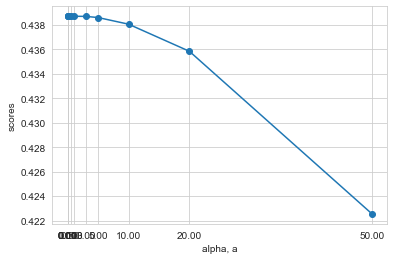

In [60]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 10, 20, 50] # here alpha is lambda, the coefficient of lasso penalty
scores = []

for a in alphas:
    lasso = Lasso(alpha = a, normalize = False) #our data is already scaled / normalized
    lasso.fit(X_train_sc, y_train)
    scores.append(lasso.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

### Using grid search to find best alpha:

In [61]:
# define model
model = Lasso(fit_intercept=True, normalize = False, max_iter=1000)

# define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_squared_error', cv = cv)
# perform the search
results = search.fit(X_train, y_train)

In [62]:
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -874444.211
Config: {'alpha': 0.02}


* Running Lasso with alpha = 0.02

In [63]:
model_lasso = Lasso(alpha =  0.02, fit_intercept=True, normalize=False, max_iter=1000)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.02)

In [64]:
y_hat_train = model_lasso.predict(X_train)

In [65]:
#Lets calculate the MSE and RMSE from our training data
train_mse = mean_squared_error(y_train, y_hat_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_hat_train)
train_r_squared = r2_score(y_train, y_hat_train)
train_mape = mean_absolute_percentage_error(y_train, y_hat_train)

print(f' the train MSE is:{train_mse}')
print(f' the train RMSE is:{train_rmse}')
print(f' the train MAE is:{train_mae}')
print(f' the train Rsquared is:{train_r_squared}')
print(f' the train MAPE is:{train_mape}')

 the train MSE is:873293.6755322609
 the train RMSE is:934.5018328137515
 the train MAE is:617.9937530606396
 the train Rsquared is:0.42930175997744013
 the train MAPE is:1.3178997445548114e+17


In [66]:
# Calculates the estimated y values using the test dataset
y_hat_test = model_lasso.predict(X_test)

In [67]:
#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f' the test MSE is:{test_mse}')
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAE is:{test_mae}')
print(f' the test Rsquared is:{test_r_squared}')
print(f' the test MAPE is:{test_mape}')

 the test MSE is:826204.9857316052
 the test RMSE is:908.9581870095044
 the test MAE is:604.517059939959
 the test Rsquared is:0.4386795097252296
 the test MAPE is:1.2883083251999237e+17


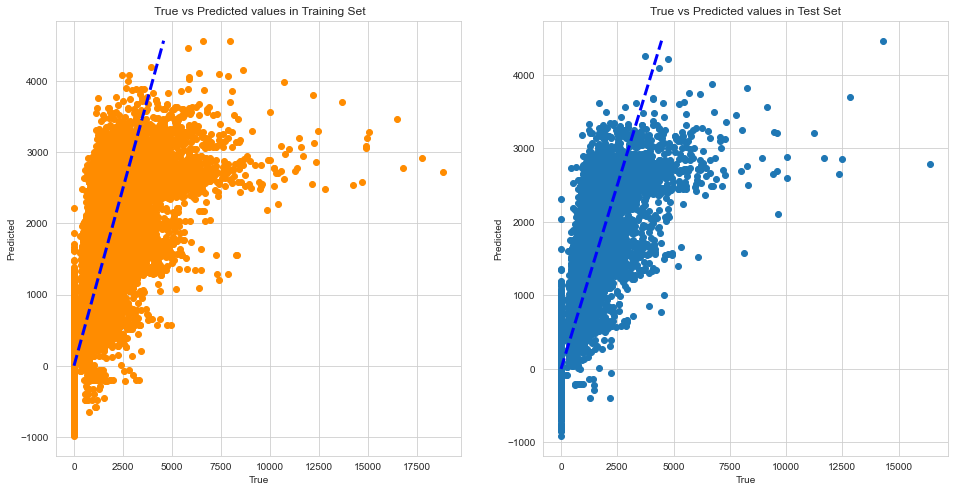

In [68]:
#Code Block 30

fig = plt.figure(figsize= (16,8))
plt.subplot(121)
plt.plot(y_train, y_hat_train, "o", color = "darkorange" )
identity_line = np.linspace(max(min(y_train), min(y_hat_train)), min(max(y_train), max(y_hat_train)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(" True vs Predicted values in Training Set")

plt.subplot(122)
plt.plot(y_test, y_hat_test, "o")
identity_line = np.linspace(max(min(y_test), min(y_hat_test)), min(max(y_train), max(y_hat_test)))
plt.plot(identity_line, identity_line, color="blue", linestyle="dashed", linewidth=3.0)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("True vs Predicted values in Test Set")
plt.show()

In [69]:
lasso_coef = model_lasso.coef_
lasso_coef

array([ 360.70899438,   -8.87356199,  130.486375  ,  124.26812889,
         73.16729082, 1128.14294374,   67.38009129, 1594.19304992,
       -916.21248192,  -97.55632008, -269.4604776 ,  -15.37289716,
        173.60055793,   43.75590569, -156.80072524,   85.56496076,
          0.        ])

In [70]:
df_lasso = pd.DataFrame([lasso_coef])
df_lasso

0         1           2           3          4            5   \
0  360.708994 -8.873562  130.486375  124.268129  73.167291  1128.142944   

          6           7           8         9           10         11  \
0  67.380091  1594.19305 -916.212482 -97.55632 -269.460478 -15.372897   

           12         13          14         15   16  
0  173.600558  43.755906 -156.800725  85.564961  0.0

In [71]:
df_lasso = pd.DataFrame(lasso_coef)
names = pd.DataFrame(list(X.columns))
df_lasso  = pd.concat([names, df_lasso], axis = 1)
df_lasso .columns = ['Feature', 'lasso_coeff']
df_lasso  = df_lasso .sort_values(by='lasso_coeff', ascending = False)
df_lasso 

Feature  lasso_coeff
7                  BiFcCoverageInd_NOBI FC  1594.193050
5                    BiFcCoverageInd_BI FC  1128.142944
0                            DriversActive   360.708994
12        NamedInsuredMaritalStatus_Single   173.600558
2                               PolicyTerm   130.486375
3                             DriverNumber   124.268129
15   CoverageTypeDescription_Full Coverage    85.564961
4                              DriverCount    73.167291
6                  BiFcCoverageInd_BI NOFC    67.380091
13       NamedInsuredMaritalStatus_Widowed    43.755906
16  CoverageTypeDescription_Liability Only     0.000000
1                          PolicyStateCode    -8.873562
11     NamedInsuredMaritalStatus_Separated   -15.372897
9       NamedInsuredMaritalStatus_Divorced   -97.556320
14            CoverageTypeDescription_Bond  -156.800725
10       NamedInsuredMaritalStatus_Married  -269.460478
8                BiFcCoverageInd_NOBI NOFC  -916.212482

In [72]:
df_lasso_sig = df_lasso[df_lasso['lasso_coeff']!=0]
df_lasso_sig

Feature  lasso_coeff
7                 BiFcCoverageInd_NOBI FC  1594.193050
5                   BiFcCoverageInd_BI FC  1128.142944
0                           DriversActive   360.708994
12       NamedInsuredMaritalStatus_Single   173.600558
2                              PolicyTerm   130.486375
3                            DriverNumber   124.268129
15  CoverageTypeDescription_Full Coverage    85.564961
4                             DriverCount    73.167291
6                 BiFcCoverageInd_BI NOFC    67.380091
13      NamedInsuredMaritalStatus_Widowed    43.755906
1                         PolicyStateCode    -8.873562
11    NamedInsuredMaritalStatus_Separated   -15.372897
9      NamedInsuredMaritalStatus_Divorced   -97.556320
14           CoverageTypeDescription_Bond  -156.800725
10      NamedInsuredMaritalStatus_Married  -269.460478
8               BiFcCoverageInd_NOBI NOFC  -916.212482

* With Lasso we were able to conduct feature selection on Liability coverage. However, this doesn't appear to have given us better r-squared values, as we seem to be hovering around the same as multiple regression. This might be because of our numerous categorical variables, with LASSO sometimes not dealing with categorical variables particularly well. We'll try Ridge and see if that's better.

### Comparing accuracy of model with predicted to actual values

In [73]:
lasso_pred = model_lasso.predict(X_test_sc)


lasso_results = pd.DataFrame(y_test.reset_index())
df_lasso_pred = pd.DataFrame(lasso_pred)
lasso_results = pd.concat([lasso_results, df_lasso_pred], axis = 1)
lasso_results = lasso_results.rename(columns = {0:'lasso_pred'})
lasso_results.head()

index  MQuotedTotalPayment   lasso_pred
0   7046               653.00  -136.473703
1   5327              1145.00 -1310.069558
2  20280               749.69 -1543.132381
3  23603              2672.00   625.431364
4  34194              1879.00   777.044851

In [74]:
lasso_results['lasso_resid'] = lasso_results['MQuotedTotalPayment'] - lasso_results['lasso_pred']

df_results = lasso_results
df_results.head()

index  MQuotedTotalPayment   lasso_pred  lasso_resid
0   7046               653.00  -136.473703   789.473703
1   5327              1145.00 -1310.069558  2455.069558
2  20280               749.69 -1543.132381  2292.822381
3  23603              2672.00   625.431364  2046.568636
4  34194              1879.00   777.044851  1101.955149

In [75]:
# Implementing Linear Regression model to append results to our lasso results DF

from sklearn.linear_model import LinearRegression

X_test = X_test_sc
X_train = X_train_sc

linreg = LinearRegression(fit_intercept=True, normalize=True)
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

print ('Linear Regression R Sq. Score ---------')
print ('')
print (linreg.score(X_test, y_test))
print('')
print ('---------------------------')

df_linreg = pd.DataFrame(linreg.coef_)
names = pd.DataFrame(list(X.columns))
df_linreg = pd.concat([names, df_linreg], axis = 1)
df_linreg.columns = ['Feature', 'linreg_coeff']
df_linreg = df_linreg.sort_values(by='linreg_coeff', ascending = False)
df_linreg

Linear Regression R Sq. Score ---------

0.43886553626487146

---------------------------


Feature  linreg_coeff
6                  BiFcCoverageInd_BI NOFC  4.494320e+15
8                BiFcCoverageInd_NOBI NOFC  2.406204e+15
5                    BiFcCoverageInd_BI FC  2.273538e+15
15   CoverageTypeDescription_Full Coverage  2.085727e+15
12        NamedInsuredMaritalStatus_Single  4.775406e+14
7                  BiFcCoverageInd_NOBI FC  4.167551e+14
10       NamedInsuredMaritalStatus_Married  4.150137e+14
9       NamedInsuredMaritalStatus_Divorced  2.981891e+14
11     NamedInsuredMaritalStatus_Separated  2.093674e+14
13       NamedInsuredMaritalStatus_Widowed  1.367794e+14
2                               PolicyTerm  3.774634e+02
0                            DriversActive  2.049976e+02
4                              DriverCount  8.930667e+01
3                             DriverNumber  2.928730e+01
1                          PolicyStateCode -1.241805e+02
14            CoverageTypeDescription_Bond -4.789764e+12
16  CoverageTypeDescription_Liability Only -2.797189e+13

* Using a non-backwards elmination model will yield unusuable coefficients, so we will not be appending them to our results df. We will instead use the residuals and predicted values for linear regression

In [76]:
df_linreg_pred = pd.DataFrame(linreg_pred, columns = ['linreg_pred'])


df_results = pd.concat([df_results, df_linreg_pred], axis=1)
df_results['linreg_resid'] = df_results['MQuotedTotalPayment'] - df_results['linreg_pred']
df_results

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0      7046               653.00  -136.473703   789.473703  1602.241757   
1      5327              1145.00 -1310.069558  2455.069558  1553.343320   
2     20280               749.69 -1543.132381  2292.822381   531.843320   
3     23603              2672.00   625.431364  2046.568636  2475.241757   
4     34194              1879.00   777.044851  1101.955149  1871.241757   
...     ...                  ...          ...          ...          ...   
6988    814              1129.00 -1322.152765  2451.152765  1384.343320   
6989   9837              1541.00   615.256032   925.743968  2332.741757   
6990  26479              2913.00 -1247.581689  4160.581689  1662.343320   
6991  10128               638.00 -5413.253276  6051.253276  -196.656680   
6992  11902              2325.00  1160.049743  1164.950257  2693.741757   

      linreg_resid  
0      -949.241757  
1      -408.343320  
2       217.846680  
3       196.758243  
4         7.758243  
...            ...  
6988   -255.343320  
6989   -791.741757  
6990   1250.656680  
6991    834.656680  
6992   -368.741757  

[6993 rows x 6 columns]

## Ridge Regression

iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 5 done
iteration 10 done
iteration 25 done
iteration 50 done
iteration 100 done
iteration 500 done
iteration 600 done


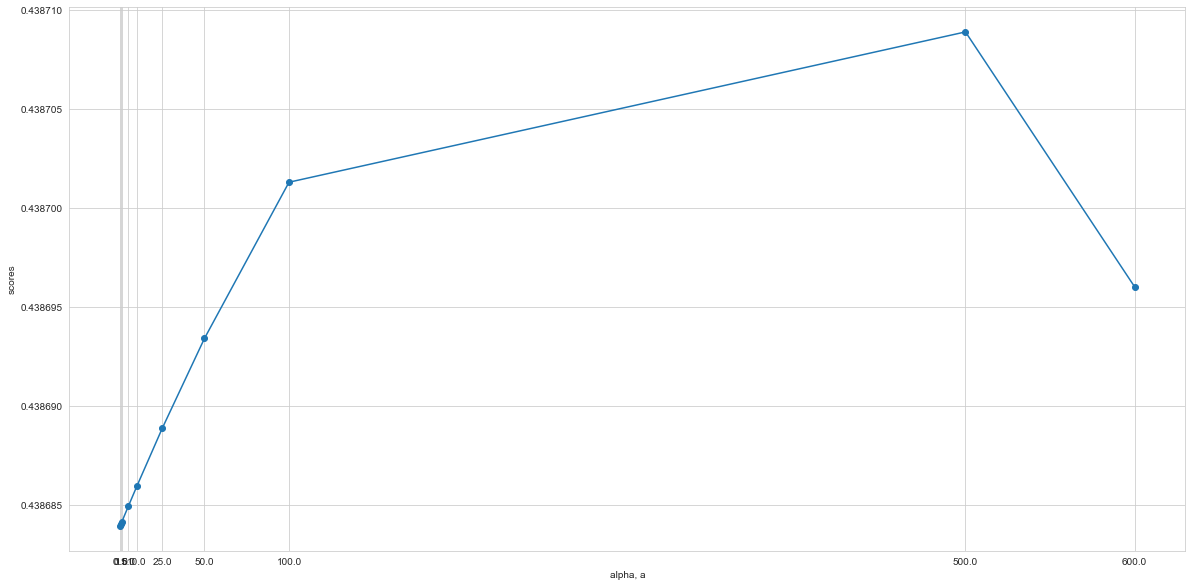

In [77]:
plt.figure(figsize=(20,10))

#alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,  0.05, 0.1, 0.25, 0.5]
alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100,500,600]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=True)
    ridge.fit(X_train_sc, y_train)
    scores.append(ridge.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()


In [78]:
# Define technique to be used
reg_model = Ridge(fit_intercept=True, max_iter=1000)

# Define cross validation approach
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(500, 501, .01)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=cv, n_jobs=-1)
search_results = search.fit(X_train_sc, y_train)

# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s'   % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 500.0}
Best Value for Scoring Method: 0.42892


In [79]:
ridge = Ridge(alpha=500, fit_intercept=True, max_iter=3000)

In [80]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=500, max_iter=3000)

In [81]:
ridge_pred = ridge.predict(X_test_sc)

In [82]:
y_hat_test_sc = ridge_pred

#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test_sc)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_sc)
test_r_squared = r2_score(y_test, y_hat_test_sc)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_sc)

In [83]:
print(f' the test MSE is:{test_mse}')
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAE is:{test_mae}')
print(f' the test Rsquared is:{test_r_squared}')
print(f' the test MAPE is:{test_mape}')

 the test MSE is:826161.7175378561
 the test RMSE is:908.9343857165137
 the test MAE is:603.2740998172865
 the test Rsquared is:0.43870890596968226
 the test MAPE is:1.2914953487853986e+17


In [84]:
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
display(df_ridge_pred.head())

ridge_pred
0  1623.478244
1  1546.172573
2   545.583352
3  2474.681036
4  1884.657528

In [85]:
df_results = pd.concat([df_results, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['MQuotedTotalPayment'] - df_results['ridge_pred']
df_results

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0      7046               653.00  -136.473703   789.473703  1602.241757   
1      5327              1145.00 -1310.069558  2455.069558  1553.343320   
2     20280               749.69 -1543.132381  2292.822381   531.843320   
3     23603              2672.00   625.431364  2046.568636  2475.241757   
4     34194              1879.00   777.044851  1101.955149  1871.241757   
...     ...                  ...          ...          ...          ...   
6988    814              1129.00 -1322.152765  2451.152765  1384.343320   
6989   9837              1541.00   615.256032   925.743968  2332.741757   
6990  26479              2913.00 -1247.581689  4160.581689  1662.343320   
6991  10128               638.00 -5413.253276  6051.253276  -196.656680   
6992  11902              2325.00  1160.049743  1164.950257  2693.741757   

      linreg_resid   ridge_pred  ridge_resid  
0      -949.241757  1623.478244  -970.478244  
1      -408.343320  1546.172573  -401.172573  
2       217.846680   545.583352   204.106648  
3       196.758243  2474.681036   197.318964  
4         7.758243  1884.657528    -5.657528  
...            ...          ...          ...  
6988   -255.343320  1380.653507  -251.653507  
6989   -791.741757  2335.296559  -794.296559  
6990   1250.656680  1653.791304  1259.208696  
6991    834.656680  -185.877863   823.877863  
6992   -368.741757  2694.122682  -369.122682  

[6993 rows x 8 columns]

In [86]:
df_ridge = pd.DataFrame(ridge.coef_)

In [87]:
names = pd.DataFrame(list(X.columns))
df_ridge = pd.concat([names, df_ridge], axis = 1)
df_ridge.head()

0           0
0    DriversActive  193.995033
1  PolicyStateCode -121.552470
2       PolicyTerm  370.356265
3     DriverNumber   29.928785
4      DriverCount   88.825764

In [88]:
df_ridge.columns = ['Feature', 'ridge_coeff']
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending = False)
df_ridge

Feature  ridge_coeff
2                               PolicyTerm   370.356265
0                            DriversActive   193.995033
15   CoverageTypeDescription_Full Coverage   182.362292
5                    BiFcCoverageInd_BI FC   169.786222
12        NamedInsuredMaritalStatus_Single    96.866597
4                              DriverCount    88.825764
7                  BiFcCoverageInd_NOBI FC    72.389757
3                             DriverNumber    29.928785
13       NamedInsuredMaritalStatus_Widowed    10.023053
11     NamedInsuredMaritalStatus_Separated     1.993791
9       NamedInsuredMaritalStatus_Divorced   -21.855922
6                  BiFcCoverageInd_BI NOFC   -31.254874
14            CoverageTypeDescription_Bond   -42.752647
10       NamedInsuredMaritalStatus_Married  -100.066392
1                          PolicyStateCode  -121.552470
16  CoverageTypeDescription_Liability Only  -174.475574
8                BiFcCoverageInd_NOBI NOFC  -274.772115

In [89]:
df_reg = pd.merge(df_lasso, df_ridge, how='inner', on='Feature')
df_reg

Feature  lasso_coeff  ridge_coeff
0                  BiFcCoverageInd_NOBI FC  1594.193050    72.389757
1                    BiFcCoverageInd_BI FC  1128.142944   169.786222
2                            DriversActive   360.708994   193.995033
3         NamedInsuredMaritalStatus_Single   173.600558    96.866597
4                               PolicyTerm   130.486375   370.356265
5                             DriverNumber   124.268129    29.928785
6    CoverageTypeDescription_Full Coverage    85.564961   182.362292
7                              DriverCount    73.167291    88.825764
8                  BiFcCoverageInd_BI NOFC    67.380091   -31.254874
9        NamedInsuredMaritalStatus_Widowed    43.755906    10.023053
10  CoverageTypeDescription_Liability Only     0.000000  -174.475574
11                         PolicyStateCode    -8.873562  -121.552470
12     NamedInsuredMaritalStatus_Separated   -15.372897     1.993791
13      NamedInsuredMaritalStatus_Divorced   -97.556320   -21.855922
14            CoverageTypeDescription_Bond  -156.800725   -42.752647
15       NamedInsuredMaritalStatus_Married  -269.460478  -100.066392
16               BiFcCoverageInd_NOBI NOFC  -916.212482  -274.772115

* Once again our r-squared results appear to be similar with LASSO and Multiple Regression, though it is interesting just how much the coefficients differ from model to model. Perhaps Kernal Ridge will provide us some better insights.

In [90]:
X_train = X_train_sc
X_test = X_test_sc

## Kernal Ridge Regression

iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 5 done
iteration 10 done


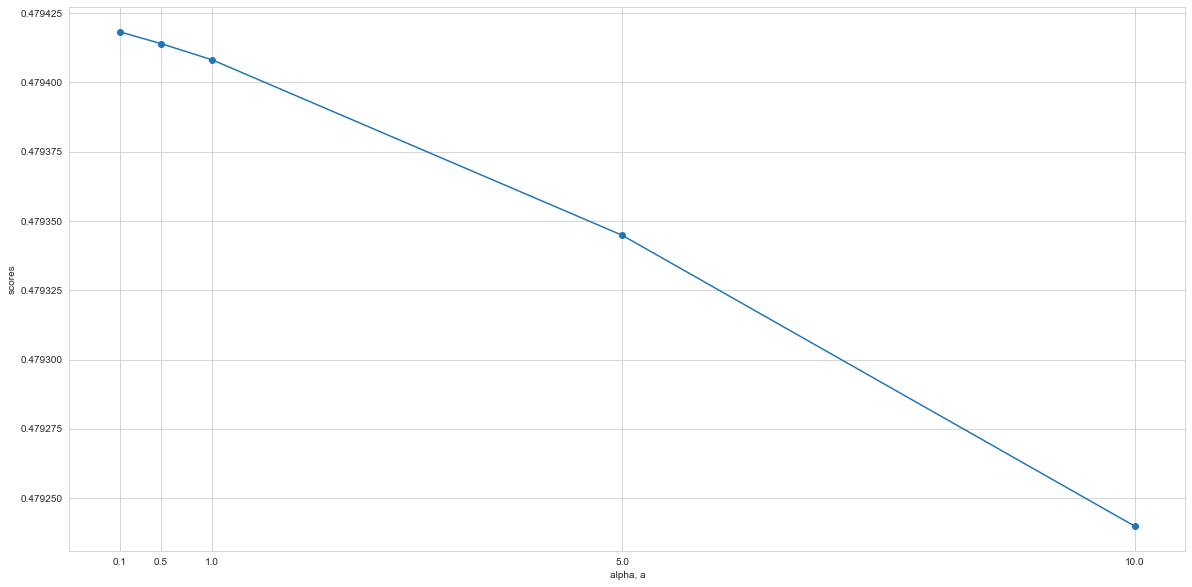

In [91]:
plt.figure(figsize=(20,10))

#alphas = [0.05, 0.01, 0.1, 1]
alphas = [0.1, 0.5, 1, 5, 10]
scores = []

for a in alphas:
    Kridge = KernelRidge(alpha = a, kernel = "polynomial", degree = 2) 
    Kridge.fit(X_train, y_train)
    scores.append(Kridge.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [92]:
#Grid search requires too much resources and memory, will use alpha = 0.1 based on trying selected alphas.
Kridge = KernelRidge(alpha = .1,  kernel = "polynomial", degree = 2)

In [93]:
Kridge.fit(X_train, y_train)

KernelRidge(alpha=0.1, degree=2, kernel='polynomial')

In [94]:
Kridge_pred = Kridge.predict(X_test)

In [95]:
y_hat_test_sc = Kridge_pred

#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test_sc)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_sc)
test_r_squared = r2_score(y_test, y_hat_test_sc)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_sc)

print(f' the test MSE is:{test_mse}')
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAE is:{test_mae}')
print(f' the test Rsquared is:{test_r_squared}')
print(f' the test MAPE is:{test_mape}')

 the test MSE is:766241.9060513126
 the test RMSE is:875.3524467614817
 the test MAE is:572.3746751221735
 the test Rsquared is:0.4794181954821576
 the test MAPE is:8.361604434101902e+16


* Rsquared appears to be a bit better, still not extremely strong, but enough for us to draw some meaningful conclusions. This helps us understand that while this rsquared number is stronger than our other models, it isn't something that we have to be entirely concerned about if we were to use an alternative model.

## Analyzing results and conclusions

In [96]:
df_Kridge_pred = pd.DataFrame(Kridge_pred, columns = ['Kridge_pred'])
display(df_Kridge_pred.head())
df_Kridge_pred.shape

Kridge_pred
0  1403.216523
1  1447.571320
2   744.691333
3  2451.411931
4  1717.483148

(6993, 1)

In [97]:
df_results = pd.concat([df_results, df_Kridge_pred], axis=1)
df_results['Kridge_resid'] = df_results['MQuotedTotalPayment'] - df_results['Kridge_pred']
df_results

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0      7046               653.00  -136.473703   789.473703  1602.241757   
1      5327              1145.00 -1310.069558  2455.069558  1553.343320   
2     20280               749.69 -1543.132381  2292.822381   531.843320   
3     23603              2672.00   625.431364  2046.568636  2475.241757   
4     34194              1879.00   777.044851  1101.955149  1871.241757   
...     ...                  ...          ...          ...          ...   
6988    814              1129.00 -1322.152765  2451.152765  1384.343320   
6989   9837              1541.00   615.256032   925.743968  2332.741757   
6990  26479              2913.00 -1247.581689  4160.581689  1662.343320   
6991  10128               638.00 -5413.253276  6051.253276  -196.656680   
6992  11902              2325.00  1160.049743  1164.950257  2693.741757   

      linreg_resid   ridge_pred  ridge_resid  Kridge_pred  Kridge_resid  
0      -949.241757  1623.478244  -970.478244  1403.216523   -750.216523  
1      -408.343320  1546.172573  -401.172573  1447.571320   -302.571320  
2       217.846680   545.583352   204.106648   744.691333      4.998667  
3       196.758243  2474.681036   197.318964  2451.411931    220.588069  
4         7.758243  1884.657528    -5.657528  1717.483148    161.516852  
...            ...          ...          ...          ...           ...  
6988   -255.343320  1380.653507  -251.653507  1354.670771   -225.670771  
6989   -791.741757  2335.296559  -794.296559  2302.743019   -761.743019  
6990   1250.656680  1653.791304  1259.208696  1581.267093   1331.732907  
6991    834.656680  -185.877863   823.877863   261.631478    376.368522  
6992   -368.741757  2694.122682  -369.122682  3026.085044   -701.085044  

[6993 rows x 10 columns]

In [98]:
df_coef = df_reg.set_index('Feature')
df_coef

lasso_coeff  ridge_coeff
Feature                                                         
BiFcCoverageInd_NOBI FC                 1594.193050    72.389757
BiFcCoverageInd_BI FC                   1128.142944   169.786222
DriversActive                            360.708994   193.995033
NamedInsuredMaritalStatus_Single         173.600558    96.866597
PolicyTerm                               130.486375   370.356265
DriverNumber                             124.268129    29.928785
CoverageTypeDescription_Full Coverage     85.564961   182.362292
DriverCount                               73.167291    88.825764
BiFcCoverageInd_BI NOFC                   67.380091   -31.254874
NamedInsuredMaritalStatus_Widowed         43.755906    10.023053
CoverageTypeDescription_Liability Only     0.000000  -174.475574
PolicyStateCode                           -8.873562  -121.552470
NamedInsuredMaritalStatus_Separated      -15.372897     1.993791
NamedInsuredMaritalStatus_Divorced       -97.556320   -21.855922
CoverageTypeDescription_Bond            -156.800725   -42.752647
NamedInsuredMaritalStatus_Married       -269.460478  -100.066392
BiFcCoverageInd_NOBI NOFC               -916.212482  -274.772115

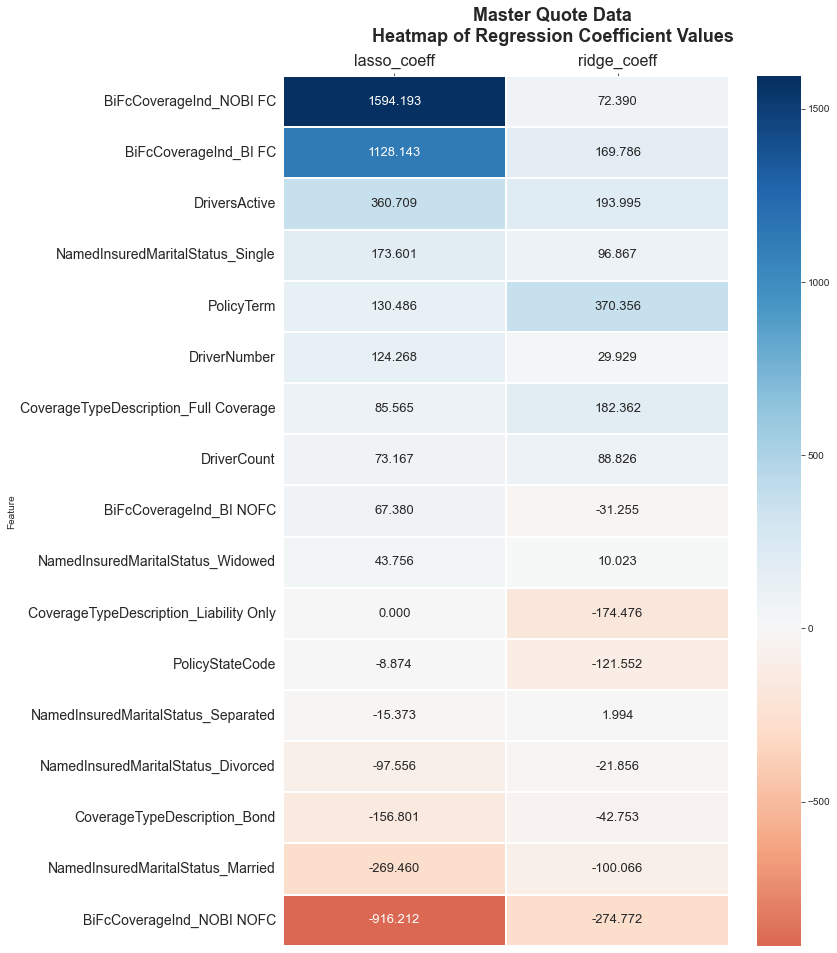

In [99]:
index = df_coef.index
plt.figure(figsize=(10,16))
ax = sns.heatmap(df_coef, linewidths=0.1, center = 0, cmap='RdBu', linecolor='white', 
            annot=True, fmt=".3f", annot_kws={"size": 13})
ax.xaxis.tick_top()    # Put x labels at top of plot
ax.set_xticklabels(df_coef.columns.values, fontsize = 16)
ax.set_yticklabels(index, fontsize = 14)
plt.suptitle('Master Quote Data\nHeatmap of Regression Coefficient Values', fontweight='bold', 
          fontsize='18', ha='center', y=.94)
plt.show()

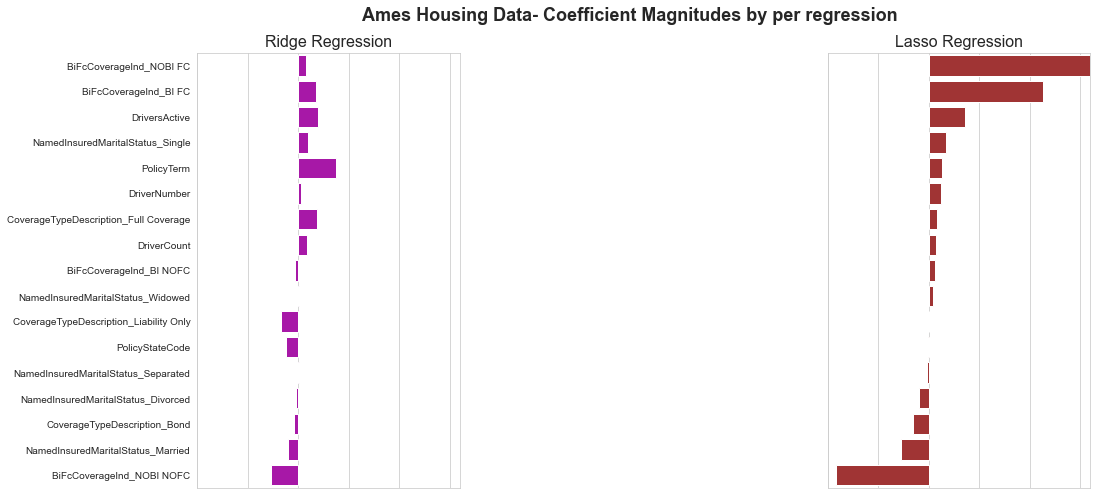

In [100]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace=0.15)

# Set overall title for plot
plt.suptitle('Ames Housing Data- Coefficient Magnitudes by per regression', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .96)

# Create a bar plot of regression coefficients for linear regression
plt.subplot(131)
chart1 = sns.barplot(y = index, x = "ridge_coeff", data = df_coef, color = 'm')
chart1.set_title("Ridge Regression", fontdict = {'fontsize' : 16})
chart1.set_xlim([-1000, 1600])
chart1.tick_params(labelbottom=False)   # Remove bottom tick labels
chart1.set(xlabel="", ylabel = "")

# Create a bar plot of regression coefficients for lasso regression
plt.subplot(133)

chart3 = sns.barplot(y = index, x = "lasso_coeff", data = df_coef, color = 'firebrick')
chart3.set_title("Lasso Regression", fontdict = {'fontsize' : 16})
chart3.set_xlim([-1000, 1600])
chart3.tick_params(labelbottom=False)   # Remove bottom tick labels
chart3.set(xlabel="", ylabel = "")
chart3.tick_params(labelleft=False)

plt.show()

<Figure size 1728x720 with 0 Axes>

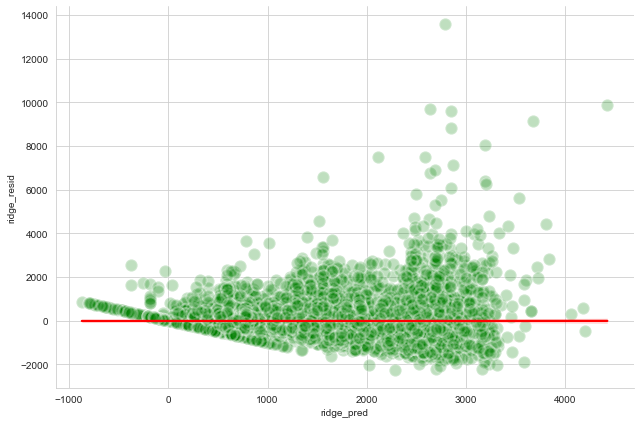

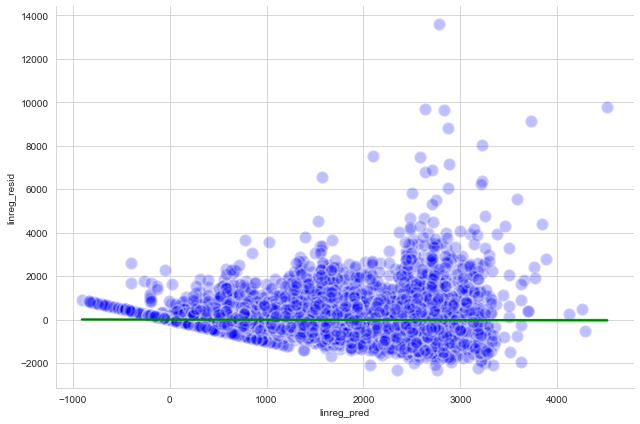

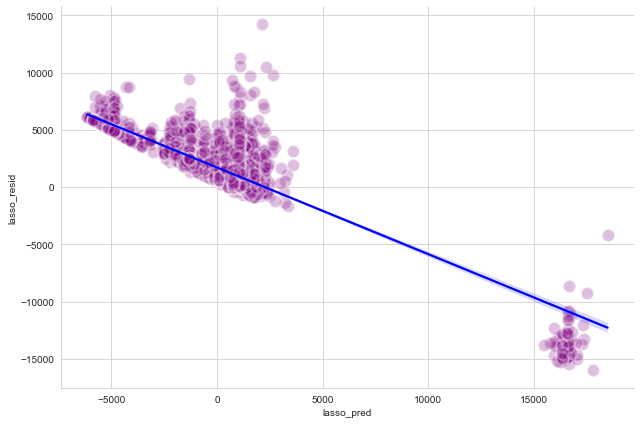

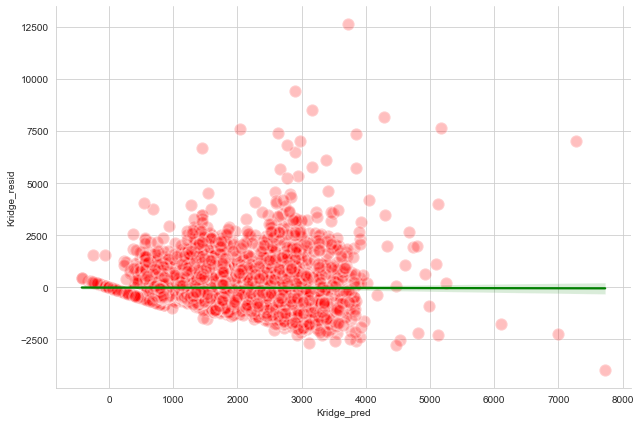

In [101]:
plt.figure(figsize=(24,10)) #changes area of scatterplot

sns.lmplot(x='ridge_pred', y='ridge_resid', data = df_results, height=6,
           aspect = 1.5, scatter_kws={"alpha":0.25,"s":150,"linewidth":2,"color":"green","edgecolor":"white"}, line_kws={'color': 'red'})
sns.lmplot(x='linreg_pred', y='linreg_resid', data = df_results, palette="Set1", height=6,
           aspect = 1.5, scatter_kws={"alpha":0.25,"s":150,"linewidth":2,"color":"blue","edgecolor":"white"}, line_kws={'color': 'green'})
sns.lmplot(x='lasso_pred', y='lasso_resid', data = df_results, palette="Set1", height=6,
           aspect = 1.5, scatter_kws={"alpha":0.25,"s":150,"linewidth":2,"color":"purple","edgecolor":"white"}, line_kws={'color': 'blue'})
sns.lmplot(x='Kridge_pred', y='Kridge_resid', data = df_results, height=6,
           aspect = 1.5, scatter_kws={"alpha":0.25,"s":150,"linewidth":2,"color":"red","edgecolor":"white"}, line_kws={'color': 'green'})
#plt.show()

* Lasso doesn't appear to have constant variance according to our scatter plot, so it's not something we can really rely on from a regression standpoint. The rest have pretty constant variance.

### Analyzing prediction accuracy of regressions

In [102]:
df_results['Kridge_resid_abs'] = abs(df_results['Kridge_resid'])
df_results['ridge_resid_abs'] = abs(df_results['ridge_resid'])
df_results['linreg_resid_abs'] = abs(df_results['linreg_resid'])
df_results['lasso_resid_abs'] = abs(df_results['lasso_resid'])
df_results

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0      7046               653.00  -136.473703   789.473703  1602.241757   
1      5327              1145.00 -1310.069558  2455.069558  1553.343320   
2     20280               749.69 -1543.132381  2292.822381   531.843320   
3     23603              2672.00   625.431364  2046.568636  2475.241757   
4     34194              1879.00   777.044851  1101.955149  1871.241757   
...     ...                  ...          ...          ...          ...   
6988    814              1129.00 -1322.152765  2451.152765  1384.343320   
6989   9837              1541.00   615.256032   925.743968  2332.741757   
6990  26479              2913.00 -1247.581689  4160.581689  1662.343320   
6991  10128               638.00 -5413.253276  6051.253276  -196.656680   
6992  11902              2325.00  1160.049743  1164.950257  2693.741757   

      linreg_resid   ridge_pred  ridge_resid  Kridge_pred  Kridge_resid  \
0      -949.241757  1623.478244  -970.478244  1403.216523   -750.216523   
1      -408.343320  1546.172573  -401.172573  1447.571320   -302.571320   
2       217.846680   545.583352   204.106648   744.691333      4.998667   
3       196.758243  2474.681036   197.318964  2451.411931    220.588069   
4         7.758243  1884.657528    -5.657528  1717.483148    161.516852   
...            ...          ...          ...          ...           ...   
6988   -255.343320  1380.653507  -251.653507  1354.670771   -225.670771   
6989   -791.741757  2335.296559  -794.296559  2302.743019   -761.743019   
6990   1250.656680  1653.791304  1259.208696  1581.267093   1331.732907   
6991    834.656680  -185.877863   823.877863   261.631478    376.368522   
6992   -368.741757  2694.122682  -369.122682  3026.085044   -701.085044   

      Kridge_resid_abs  ridge_resid_abs  linreg_resid_abs  lasso_resid_abs  
0           750.216523       970.478244        949.241757       789.473703  
1           302.571320       401.172573        408.343320      2455.069558  
2             4.998667       204.106648        217.846680      2292.822381  
3           220.588069       197.318964        196.758243      2046.568636  
4           161.516852         5.657528          7.758243      1101.955149  
...                ...              ...               ...              ...  
6988        225.670771       251.653507        255.343320      2451.152765  
6989        761.743019       794.296559        791.741757       925.743968  
6990       1331.732907      1259.208696       1250.656680      4160.581689  
6991        376.368522       823.877863        834.656680      6051.253276  
6992        701.085044       369.122682        368.741757      1164.950257  

[6993 rows x 14 columns]

In [103]:
df_results_T = df_results[['Kridge_resid_abs','ridge_resid_abs', 'linreg_resid_abs', 'lasso_resid_abs']].T
df_results_T

0            1            2            3     \
Kridge_resid_abs  750.216523   302.571320     4.998667   220.588069   
ridge_resid_abs   970.478244   401.172573   204.106648   197.318964   
linreg_resid_abs  949.241757   408.343320   217.846680   196.758243   
lasso_resid_abs   789.473703  2455.069558  2292.822381  2046.568636   

                         4           5            6            7     \
Kridge_resid_abs   161.516852  567.840342   325.009886   167.087589   
ridge_resid_abs      5.657528  943.704263   620.983997   160.527744   
linreg_resid_abs     7.758243  946.741757   629.343320   176.656680   
lasso_resid_abs   1101.955149  285.988494  1787.400112  2694.254205   

                         8            9            10           11    \
Kridge_resid_abs   461.952264   705.651604   157.579341   175.532107   
ridge_resid_abs    429.353316  1037.369532   181.095858    78.300726   
linreg_resid_abs   432.843320  1066.343320   183.843320   104.463320   
lasso_resid_abs   2541.606697  1582.263119  2481.332557  2441.102499   

                        12           13           14           15    \
Kridge_resid_abs   57.441537   444.990019   210.638072   396.106287   
ridge_resid_abs   285.703970   443.392855    55.812787   655.415676   
linreg_resid_abs  263.741757   440.241757    75.508243   658.258243   
lasso_resid_abs   989.027435  1490.559950  3961.443227  2092.581756   

                         16           17           18           19    \
Kridge_resid_abs   707.426064   550.388955   367.138653   443.218932   
ridge_resid_abs    415.857711   484.019940   403.692089   306.442870   
linreg_resid_abs   407.656680   478.258243   404.843320   304.741757   
lasso_resid_abs   2279.362103  2117.444942  2186.056181  1177.746204   

                         20           21           22           23    \
Kridge_resid_abs   189.936007   292.875717  1608.063163    93.476617   
ridge_resid_abs    292.614252   220.002755  1502.865897   284.178274   
linreg_resid_abs   301.758243   212.343320  1495.406680   272.843320   
lasso_resid_abs   2438.648602  2130.453836  4367.183600  4895.968174   

                         24           25           26           27    \
Kridge_resid_abs   216.588154    79.900212    43.009790  1249.288929   
ridge_resid_abs     36.558168   253.920080   172.910255  1194.470313   
linreg_resid_abs    36.741757   266.656680   180.156680  1210.741757   
lasso_resid_abs   1528.386621  2378.260668  3398.846652   103.649148   

                        28          29           30           31    \
Kridge_resid_abs  800.159248  309.434592   622.685679   243.603439   
ridge_resid_abs   751.904512  575.187822   898.074949   385.941752   
linreg_resid_abs  747.741757  557.741757   916.843320   394.343320   
lasso_resid_abs   635.377703  643.820169  2293.141256  2518.753808   

                        32           33           34           35    \
Kridge_resid_abs   98.867169  2372.198075    42.992331   571.787081   
ridge_resid_abs   256.199543  2441.189285    87.345745   743.597673   
linreg_resid_abs  239.241757  2409.156680    92.343320   759.843320   
lasso_resid_abs   702.730279  5072.773148  2680.065099  2355.464677   

                         36           37          38           39    \
Kridge_resid_abs   150.099788  1352.144298  954.733238    30.768325   
ridge_resid_abs     23.920080  1440.513104  950.383828   238.184454   
linreg_resid_abs    36.656680  1447.656680  957.741757   222.741757   
lasso_resid_abs   2148.260668  3811.873841  755.721317  1303.040812   

                         40           41           42           43    \
Kridge_resid_abs    36.010790    40.028015     5.664731    62.511365   
ridge_resid_abs     68.989087   113.847218    69.326454    27.359419   
linreg_resid_abs    64.241757   100.258243    75.843320    18.758243   
lasso_resid_abs   1792.283575  2078.370652  2754.613391  1767.197287   

                         44           45           46           47    \
Kridge_resid_abs

In [104]:
minResid = df_results_T.min()
minResid = pd.DataFrame(minResid.T, columns = ['resid_min'])
df_results = pd.concat([df_results, minResid], axis=1)
df_results.head(10)

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0   7046               653.00  -136.473703   789.473703  1602.241757   
1   5327              1145.00 -1310.069558  2455.069558  1553.343320   
2  20280               749.69 -1543.132381  2292.822381   531.843320   
3  23603              2672.00   625.431364  2046.568636  2475.241757   
4  34194              1879.00   777.044851  1101.955149  1871.241757   
5   4208              1190.00  1475.988494  -285.988494  2136.741757   
6  13649              1189.00  -598.400112  1787.400112  1818.343320   
7  10387               427.00 -2267.254205  2694.254205   250.343320   
8  32144               799.00 -1742.606697  2541.606697  1231.843320   
9  12118               929.00  -653.263119  1582.263119  1995.343320   

   linreg_resid   ridge_pred  ridge_resid  Kridge_pred  Kridge_resid  \
0   -949.241757  1623.478244  -970.478244  1403.216523   -750.216523   
1   -408.343320  1546.172573  -401.172573  1447.571320   -302.571320   
2    217.846680   545.583352   204.106648   744.691333      4.998667   
3    196.758243  2474.681036   197.318964  2451.411931    220.588069   
4      7.758243  1884.657528    -5.657528  1717.483148    161.516852   
5   -946.741757  2133.704263  -943.704263  1757.840342   -567.840342   
6   -629.343320  1809.983997  -620.983997  1514.009886   -325.009886   
7    176.656680   266.472256   160.527744   594.087589   -167.087589   
8   -432.843320  1228.353316  -429.353316  1260.952264   -461.952264   
9  -1066.343320  1966.369532 -1037.369532  1634.651604   -705.651604   

   Kridge_resid_abs  ridge_resid_abs  linreg_resid_abs  lasso_resid_abs  \
0        750.216523       970.478244        949.241757       789.473703   
1        302.571320       401.172573        408.343320      2455.069558   
2          4.998667       204.106648        217.846680      2292.822381   
3        220.588069       197.318964        196.758243      2046.568636   
4        161.516852         5.657528          7.758243      1101.955149   
5        567.840342       943.704263        946.741757       285.988494   
6        325.009886       620.983997        629.343320      1787.400112   
7        167.087589       160.527744        176.656680      2694.254205   
8        461.952264       429.353316        432.843320      2541.606697   
9        705.651604      1037.369532       1066.343320      1582.263119   

    resid_min  
0  750.216523  
1  302.571320  
2    4.998667  
3  196.758243  
4    5.657528  
5  285.988494  
6  325.009886  
7  160.527744  
8  429.353316  
9  705.651604

In [105]:
def bestreg(c):
  if c['ridge_resid_abs'] == c['resid_min'] :
    return 'Ridge'
  elif c['linreg_resid_abs'] == c['resid_min'] :
    return 'Linear'
  elif c['Kridge_resid_abs'] == c['resid_min'] :
    return 'Kridge'
  else: 
    return 'Lasso'


In [106]:
df_results['best_reg'] = df_results.apply(bestreg, axis=1)
df_results

index  MQuotedTotalPayment   lasso_pred  lasso_resid  linreg_pred  \
0      7046               653.00  -136.473703   789.473703  1602.241757   
1      5327              1145.00 -1310.069558  2455.069558  1553.343320   
2     20280               749.69 -1543.132381  2292.822381   531.843320   
3     23603              2672.00   625.431364  2046.568636  2475.241757   
4     34194              1879.00   777.044851  1101.955149  1871.241757   
...     ...                  ...          ...          ...          ...   
6988    814              1129.00 -1322.152765  2451.152765  1384.343320   
6989   9837              1541.00   615.256032   925.743968  2332.741757   
6990  26479              2913.00 -1247.581689  4160.581689  1662.343320   
6991  10128               638.00 -5413.253276  6051.253276  -196.656680   
6992  11902              2325.00  1160.049743  1164.950257  2693.741757   

      linreg_resid   ridge_pred  ridge_resid  Kridge_pred  Kridge_resid  \
0      -949.241757  1623.478244  -970.478244  1403.216523   -750.216523   
1      -408.343320  1546.172573  -401.172573  1447.571320   -302.571320   
2       217.846680   545.583352   204.106648   744.691333      4.998667   
3       196.758243  2474.681036   197.318964  2451.411931    220.588069   
4         7.758243  1884.657528    -5.657528  1717.483148    161.516852   
...            ...          ...          ...          ...           ...   
6988   -255.343320  1380.653507  -251.653507  1354.670771   -225.670771   
6989   -791.741757  2335.296559  -794.296559  2302.743019   -761.743019   
6990   1250.656680  1653.791304  1259.208696  1581.267093   1331.732907   
6991    834.656680  -185.877863   823.877863   261.631478    376.368522   
6992   -368.741757  2694.122682  -369.122682  3026.085044   -701.085044   

      Kridge_resid_abs  ridge_resid_abs  linreg_resid_abs  lasso_resid_abs  \
0           750.216523       970.478244        949.241757       789.473703   
1           302.571320       401.172573        408.343320      2455.069558   
2             4.998667       204.106648        217.846680      2292.822381   
3           220.588069       197.318964        196.758243      2046.568636   
4           161.516852         5.657528          7.758243      1101.955149   
...                ...              ...               ...              ...   
6988        225.670771       251.653507        255.343320      2451.152765   
6989        761.743019       794.296559        791.741757       925.743968   
6990       1331.732907      1259.208696       1250.656680      4160.581689   
6991        376.368522       823.877863        834.656680      6051.253276   
6992        701.085044       369.122682        368.741757      1164.950257   

        resid_min best_reg  
0      750.216523   Kridge  
1      302.571320   Kridge  
2        4.998667   Kridge  
3      196.758243   Linear  
4        5.657528    Ridge  
...           ...      ...  
6988   225.670771   Kridge  
6989   761.743019   Kridge  
6990  1250.656680   Linear  
6991   376.368522   Kridge  
6992   368.741757   Linear  

[6993 rows x 16 columns]

In [107]:
df_best_reg = pd.DataFrame(df_results['best_reg'].value_counts())
df_best_reg

best_reg
Kridge      3504
Linear      1585
Ridge       1214
Lasso        690

In [108]:
df_metrics = df_results[['MQuotedTotalPayment','Kridge_pred', 'Kridge_resid', 'ridge_pred', 'ridge_resid', 'linreg_pred', 'linreg_resid', 'lasso_pred', 'lasso_resid']]
df_metrics

MQuotedTotalPayment  Kridge_pred  Kridge_resid   ridge_pred  \
0                  653.00  1403.216523   -750.216523  1623.478244   
1                 1145.00  1447.571320   -302.571320  1546.172573   
2                  749.69   744.691333      4.998667   545.583352   
3                 2672.00  2451.411931    220.588069  2474.681036   
4                 1879.00  1717.483148    161.516852  1884.657528   
...                   ...          ...           ...          ...   
6988              1129.00  1354.670771   -225.670771  1380.653507   
6989              1541.00  2302.743019   -761.743019  2335.296559   
6990              2913.00  1581.267093   1331.732907  1653.791304   
6991               638.00   261.631478    376.368522  -185.877863   
6992              2325.00  3026.085044   -701.085044  2694.122682   

      ridge_resid  linreg_pred  linreg_resid   lasso_pred  lasso_resid  
0     -970.478244  1602.241757   -949.241757  -136.473703   789.473703  
1     -401.172573  1553.343320   -408.343320 -1310.069558  2455.069558  
2      204.106648   531.843320    217.846680 -1543.132381  2292.822381  
3      197.318964  2475.241757    196.758243   625.431364  2046.568636  
4       -5.657528  1871.241757      7.758243   777.044851  1101.955149  
...           ...          ...           ...          ...          ...  
6988  -251.653507  1384.343320   -255.343320 -1322.152765  2451.152765  
6989  -794.296559  2332.741757   -791.741757   615.256032   925.743968  
6990  1259.208696  1662.343320   1250.656680 -1247.581689  4160.581689  
6991   823.877863  -196.656680    834.656680 -5413.253276  6051.253276  
6992  -369.122682  2693.741757   -368.741757  1160.049743  1164.950257  

[6993 rows x 9 columns]

In [109]:
df_metrics['linreg_resid_Sq'] = df_metrics['linreg_resid']**2
df_metrics

MQuotedTotalPayment  Kridge_pred  Kridge_resid   ridge_pred  \
0                  653.00  1403.216523   -750.216523  1623.478244   
1                 1145.00  1447.571320   -302.571320  1546.172573   
2                  749.69   744.691333      4.998667   545.583352   
3                 2672.00  2451.411931    220.588069  2474.681036   
4                 1879.00  1717.483148    161.516852  1884.657528   
...                   ...          ...           ...          ...   
6988              1129.00  1354.670771   -225.670771  1380.653507   
6989              1541.00  2302.743019   -761.743019  2335.296559   
6990              2913.00  1581.267093   1331.732907  1653.791304   
6991               638.00   261.631478    376.368522  -185.877863   
6992              2325.00  3026.085044   -701.085044  2694.122682   

      ridge_resid  linreg_pred  linreg_resid   lasso_pred  lasso_resid  \
0     -970.478244  1602.241757   -949.241757  -136.473703   789.473703   
1     -401.172573  1553.343320   -408.343320 -1310.069558  2455.069558   
2      204.106648   531.843320    217.846680 -1543.132381  2292.822381   
3      197.318964  2475.241757    196.758243   625.431364  2046.568636   
4       -5.657528  1871.241757      7.758243   777.044851  1101.955149   
...           ...          ...           ...          ...          ...   
6988  -251.653507  1384.343320   -255.343320 -1322.152765  2451.152765   
6989  -794.296559  2332.741757   -791.741757   615.256032   925.743968   
6990  1259.208696  1662.343320   1250.656680 -1247.581689  4160.581689   
6991   823.877863  -196.656680    834.656680 -5413.253276  6051.253276   
6992  -369.122682  2693.741757   -368.741757  1160.049743  1164.950257   

      linreg_resid_Sq  
0        9.010599e+05  
1        1.667443e+05  
2        4.745718e+04  
3        3.871381e+04  
4        6.019033e+01  
...               ...  
6988     6.520021e+04  
6989     6.268550e+05  
6990     1.564142e+06  
6991     6.966518e+05  
6992     1.359705e+05  

[6993 rows x 10 columns]

In [110]:
df_metrics['linreg_resid_Sq'].mean()

825931.17414412

In [111]:
linreg_mse = mean_squared_error(df_metrics['MQuotedTotalPayment'], df_metrics['linreg_pred'])
display(linreg_mse)

linreg_rmse = linreg_mse ** .5
linreg_rmse

825931.1741441194

908.8075561658361

In [112]:
lasso_mse = mean_squared_error(df_metrics['MQuotedTotalPayment'], df_metrics['lasso_pred'])
display(lasso_mse)

lasso_rmse = lasso_mse ** .5
lasso_rmse

9481204.33161072

3079.156431818741

In [113]:
ridge_mse = mean_squared_error(df_metrics['MQuotedTotalPayment'], df_metrics['ridge_pred'])
display(ridge_mse)

ridge_rmse = ridge_mse ** .5
ridge_rmse

826161.7175378561

908.9343857165137

In [114]:
Kridge_mse = mean_squared_error(df_metrics['MQuotedTotalPayment'], df_metrics['Kridge_pred'])
display(Kridge_mse)

Kridge_rmse = Kridge_mse ** .5
Kridge_rmse

766241.9060513126

875.3524467614817

In [115]:
df_compare_reg = pd.DataFrame(columns = ['R Sq', 'RMSE', 'Mean_Dev', 'Dev_StDev', 'Accurate'], index = ['Ridge', 'LinReg', 'Lasso', 'Kridge'])


df_compare_reg.iloc[0,0] = ridge.score(X_test, y_test)
df_compare_reg.iloc[1,0] = linreg.score(X_test, y_test)
df_compare_reg.iloc[2,0] = model_lasso.score(X_test, y_test)
df_compare_reg.iloc[3,0] = Kridge.score(X_test, y_test)

df_compare_reg.iloc[0,1] = ridge_rmse
df_compare_reg.iloc[1,1] = linreg_rmse
df_compare_reg.iloc[2,1] = lasso_rmse
df_compare_reg.iloc[3,1] = Kridge_rmse

df_compare_reg.iloc[0,2] = df_results['ridge_resid_abs'].mean()
df_compare_reg.iloc[1,2] = df_results['linreg_resid_abs'].mean()
df_compare_reg.iloc[2,2] = df_results['lasso_resid_abs'].mean()
df_compare_reg.iloc[3,2] = df_results['Kridge_resid_abs'].mean()

df_compare_reg.iloc[0,3] = df_results['ridge_resid_abs'].std()
df_compare_reg.iloc[1,3] = df_results['linreg_resid_abs'].std()
df_compare_reg.iloc[2,3] = df_results['lasso_resid_abs'].std()
df_compare_reg.iloc[3,3] = df_results['Kridge_resid_abs'].std()

df_compare_reg.iloc[0,4] = df_best_reg.iloc[3,0]
df_compare_reg.iloc[1,4] = df_best_reg.iloc[2,0]
df_compare_reg.iloc[2,4] = df_best_reg.iloc[1,0]
df_compare_reg.iloc[3,4] = df_best_reg.iloc[0,0]

df_compare_reg

R Sq         RMSE     Mean_Dev    Dev_StDev Accurate
Ridge   0.438709   908.934386     603.2741   679.917778      690
LinReg  0.438866   908.807556   604.404705    678.74296     1214
Lasso  -5.441494  3079.156432  2506.849128  1788.118846     1585
Kridge  0.479418   875.352447   572.374675   662.338184     3504

* It would seem by pure testing metrics that KRidge is both our most accurate and has the best r-square, RMSE, Std Dev, and accuracy. However, to generate a more practical model, we would have to look towards Ridge and Linear Regression, since our Lasso model doesn't appear to hold constant variance. It would appear that Ridge would be our best choice, as the Linear Regression model without backwards elimination holds a lot of coefficients with extremely large values, making it hard to use on a practical basis. Both r-squared metrics are fairly similar, so we don't lose anything by favoring 1.

* Ultimately, our model did not get a very high r-squared. We had trouble being able to predict the price of the quote based on the various predictors we had in place. Part of that reason might be the extensive use of categorical variables, as it may introduce a lot of confounding to our model and make it difficult for regression to interpret. I would likely consider removing more categorical variables in order to get a better model. The concern however, is when we remove all of the categoricals, it further hurts our metrics for Linear Regression, so it may be the case of we just don't have enough detailed information about the customers in order to generate a great quote.

# The General Classification
### Can we predict risk assessment using a dataset of driver insurance claims?

In [116]:
df_TheGeneral.head(10)

AbilitecContactID  PolicyNumber  DriverNumber AbilitecHouseholdID  \
0  04ZJUS02EXPR09CB  Q080MDE1MTY2             1    04ZJUS0300X496LW   
1  04ZJUS0146KL4TTS  Q080MDEwOTEx             1    04ZJUS035SBF0GJ4   
2  04ZJUS02K2KC7DMW  Q080MDExOTIz             1    04ZJUS035ZXBZEH1   
3  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
4  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
5  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
6  04ZJUS01PJ7NYRPY  Q080MDMyMTI3             1    04ZJUS03XZ9CZ9TP   
7  04ZJUS02RKNCKKL6  Q080MDQ4Nzc5             1    04ZJUS03GK738FJ5   
8  04ZJUS02RKNCKKL6  Q080MDQ4Nzc5             1    04ZJUS03GK738FJ5   
9  04ZJUS02PS9TJJXS  Q080MDQwNTI5             1    04ZJUS03JF9GYQND   

   DriverCount  ClaimCount  TotalPaid   ClaimNumber    AtFaultDescription  \
0            4           1    5086.61  PA0002364104              No fault   
1            2           1       0.00  PA0002351705      Insured at fault   
2            2           1   21397.74  PA0002344011      Insured at fault   
3            5           3       0.00  PA0002348918              No fault   
4            5           3       0.00  PA0002348997              No fault   
5            5           3       0.00  PA0002422485  Other party at fault   
6            1           1       0.00  PA0002463717  Other party at fault   
7            4           2     139.90  PA0002385291              No fault   
8            4           2     139.90  PA0002388885              No fault   
9            2           1    1437.07  PA0002452212      Insured at fault   

  ClaimStatus                 ClaimType           DateOfLoss  DriverID  \
0           C                      HAIL  2018-08-06 00:00:00        98   
1           C            PG_IVREARENDCV  2018-05-24 00:00:00         1   
2           C  PG_COLLISIONINTERSECTION  2018-06-17 00:00:00         1   
3           C                      HAIL  2018-06-19 00:00:00        98   
4           C             GLASSBREAKAGE  2018-06-30 00:00:00         1   
5           C         PG_COLLISIONMERGE  2019-01-24 00:00:00         1   
6           C                 PG_PARKED  2019-05-15 00:00:00         1   
7           C             GLASSBREAKAGE  2018-10-10 00:00:00         1   
8           C             GLASSBREAKAGE  2018-10-20 00:00:00         1   
9           C       PG_COLLISIONBACKING  2019-04-13 00:00:00         1   

  LossState PolicyStateCode SubrogrationFlag    TermEffectiveDate  VehicleID  \
0        CO              CO               NO  2018-05-29 00:00:00          1   
1        CO              CO               NO  2018-05-24 00:00:00          1   
2        CO              CO               NO  2018-05-25 00:00:00          1   
3        CO              CO              YES  2018-06-01 00:00:00          2   
4        CO              CO               NO  2018-06-01 00:00:00          2   
5        CO              CO               NO  2018-06-01 00:00:00          4   
6        CO              CO               NO  2018-06-09 00:00:00          1   
7        CO              CO               NO  2018-06-23 00:00:00          1   
8        CO              CO               NO  2018-06-23 00:00:00          1   
9        CO              CO               NO  2018-06-16 00:00:00          1   

   ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  DaysToClaim_h  
0              9.0             5086.61          0.0            0.0  
1              4.0                0.00          0.0            0.0  
2             53.0            21397.74          0.0            0.0  
3             14.0                0.00          0.0            0.0  
4              1.0                0.00          0.0            0.0  
5              8.0                0.00          0.0            0.0  
6              1.0                0.00          0.0            0.0  
7              6.0               69.95          0.0            0.0  
8              6.0               69.95          0.0    

### Identifying a target variable for Risk assessment

In [117]:
(df_TheGeneral['TotalPaid']==0).sum()

3162

In [118]:
df_TheGeneral['TotalPaid'].median()

2304.35

In [119]:
df_TheGeneral.describe()

DriverNumber   DriverCount    ClaimCount      TotalPaid      DriverID  \
count  11069.000000  11069.000000  11069.000000   11069.000000  11069.000000   
mean       1.041286      2.792032      1.940826    7706.163453     19.411239   
std        0.282314      2.440237      1.398869   14093.710283     37.955300   
min        1.000000      1.000000      1.000000       0.000000      0.000000   
25%        1.000000      1.000000      1.000000       0.000000      1.000000   
50%        1.000000      2.000000      1.000000    2304.350000      1.000000   
75%        1.000000      4.000000      2.000000    8754.270000      2.000000   
max        6.000000     34.000000     13.000000  130141.300000     99.000000   

          VehicleID  ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  \
count  11069.000000      9780.000000         9780.000000  9780.000000   
mean       3.287921        11.362372         4270.032683     1.554839   
std       34.400114        12.076882         8629.654146    19.932623   
min        0.000000         1.000000            0.000000   -25.000000   
25%        1.000000         4.000000            0.000000     0.000000   
50%        1.000000         8.000000         1162.785000     0.000000   
75%        2.000000        14.000000         4419.840000     0.000000   
max      998.000000       285.000000       113840.050000   762.000000   

       DaysToClaim_h  
count    9780.000000  
mean       37.316131  
std       478.382959  
min      -600.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max     18288.000000

* Although TotalPaid has a lot of 0 values, ultimately we can work with the median of TotalPaid to use as our assessment of Risk. I am working with the understanding that TotalPaid is the amount of money the insurance company paid to a claimant.

In [120]:
claim_Paid =[]
for paid in df_TheGeneral['TotalPaid']:
    if paid > df_TheGeneral['TotalPaid'].median():
        claim_Paid.append(int(1))
    elif paid <= df_TheGeneral['TotalPaid'].median() and paid >= 0:
        claim_Paid.append(int(0))
    else:
        claim_Paid.append(None)

In [121]:
len(claim_Paid)

11069

In [122]:
df_TheGeneral['TotalPaid'] = claim_Paid

In [123]:
df_TheGeneral.describe()

DriverNumber   DriverCount    ClaimCount     TotalPaid      DriverID  \
count  11069.000000  11069.000000  11069.000000  11069.000000  11069.000000   
mean       1.041286      2.792032      1.940826      0.499955     19.411239   
std        0.282314      2.440237      1.398869      0.500023     37.955300   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      1.000000   
50%        1.000000      2.000000      1.000000      0.000000      1.000000   
75%        1.000000      4.000000      2.000000      1.000000      2.000000   
max        6.000000     34.000000     13.000000      1.000000     99.000000   

          VehicleID  ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  \
count  11069.000000      9780.000000         9780.000000  9780.000000   
mean       3.287921        11.362372         4270.032683     1.554839   
std       34.400114        12.076882         8629.654146    19.932623   
min        0.000000         1.000000            0.000000   -25.000000   
25%        1.000000         4.000000            0.000000     0.000000   
50%        1.000000         8.000000         1162.785000     0.000000   
75%        2.000000        14.000000         4419.840000     0.000000   
max      998.000000       285.000000       113840.050000   762.000000   

       DaysToClaim_h  
count    9780.000000  
mean       37.316131  
std       478.382959  
min      -600.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max     18288.000000

In [124]:
df_TheGeneral['TotalPaid'].value_counts()

0    5535
1    5534
Name: TotalPaid, dtype: int64

### Removing miscellaneous / unclear predictors

In [125]:
df_TheGeneral = df_TheGeneral.drop(['AbilitecContactID', 'AbilitecHouseholdID', 'DateOfLoss', 'TermEffectiveDate','DaysToClaim_h'], axis = 1)

* Dates are difficult to work with, the abilitec dataset will not be used, and DaysToClaim_h is directly correlated with DaysToClaim in that it is a multiple of 24 from DaysToClaim for each value, and without any evidence as to why it exists, is not worth keeping.

### Numerical Variable Exploration

In [126]:
df_TheGeneral.describe()

DriverNumber   DriverCount    ClaimCount     TotalPaid      DriverID  \
count  11069.000000  11069.000000  11069.000000  11069.000000  11069.000000   
mean       1.041286      2.792032      1.940826      0.499955     19.411239   
std        0.282314      2.440237      1.398869      0.500023     37.955300   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      1.000000   
50%        1.000000      2.000000      1.000000      0.000000      1.000000   
75%        1.000000      4.000000      2.000000      1.000000      2.000000   
max        6.000000     34.000000     13.000000      1.000000     99.000000   

          VehicleID  ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  
count  11069.000000      9780.000000         9780.000000  9780.000000  
mean       3.287921        11.362372         4270.032683     1.554839  
std       34.400114        12.076882         8629.654146    19.932623  
min        0.000000         1.000000            0.000000   -25.000000  
25%        1.000000         4.000000            0.000000     0.000000  
50%        1.000000         8.000000         1162.785000     0.000000  
75%        2.000000        14.000000         4419.840000     0.000000  
max      998.000000       285.000000       113840.050000   762.000000

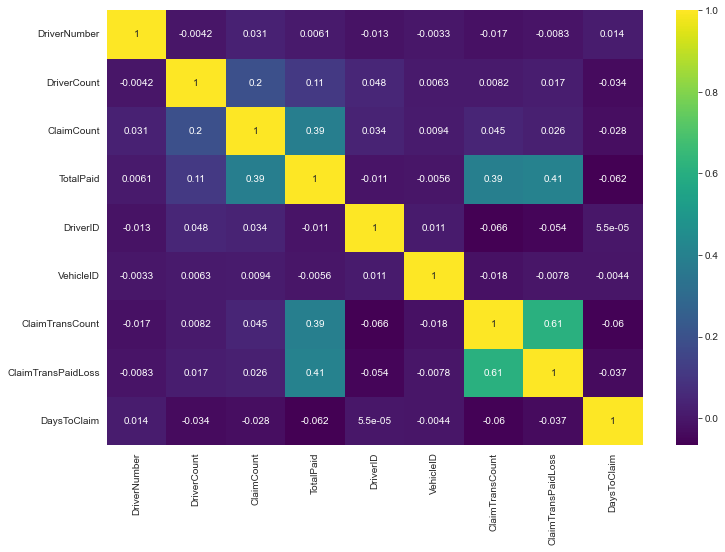

In [127]:
fig = plt.figure(figsize= (12,8))
sns.heatmap(df_TheGeneral.corr(), cmap="viridis", annot=True)
plt.show()

* There doesn't appear to be any serious correlation issues judging by the correlation plot, so we can keep these predictors

In [128]:
df_TheGeneral.duplicated(subset=['ClaimNumber']).value_counts()

False    11069
dtype: int64

In [129]:
df_TheGeneral.duplicated(subset=['PolicyNumber']).value_counts()

False    7836
True     3233
dtype: int64

* While there is a case to be made that we could aggregate data around duplicate policy numbers, I can't quite think of an elegant solution without making the data confusing and complicated to read, so I opt to just remove the predictor instead. Future experimentation would absolutely involve imputing around PolicyNumber

In [130]:
df_TheGeneral['DriverCount'].value_counts()
#Number of people on policy perhaps?

1     3710
2     3026
3     1555
4     1076
5      604
6      387
7      227
8      155
9      108
11      52
10      40
12      30
16      24
14      19
15      12
13      11
17       9
18       6
34       5
19       5
23       4
33       2
22       1
20       1
Name: DriverCount, dtype: int64

In [131]:
df_TheGeneral['ClaimCount'].value_counts()
#Unclear?

1     5746
2     2824
3     1242
4      584
5      365
6      168
7       49
8       40
10      20
9       18
13      13
Name: ClaimCount, dtype: int64

In [132]:
df_TheGeneral['DriverNumber'].value_counts()
#Seems really skewed towards 1, so we will remove as it may not be very helpful for classification

1    10768
2      200
3       55
4       39
5        5
6        2
Name: DriverNumber, dtype: int64

### Make Dummies

In [133]:
df_TheGeneral['AtFaultDescription'].value_counts()

Insured at fault          4976
Other party at fault      3122
No fault                  2574
Comparative Negligence     274
Fault unknown              123
Name: AtFaultDescription, dtype: int64

In [134]:
df_TheGeneral['SubrogrationFlag'].value_counts()

NO     9928
YES    1141
Name: SubrogrationFlag, dtype: int64

<AxesSubplot:xlabel='SubrogrationFlag', ylabel='count'>

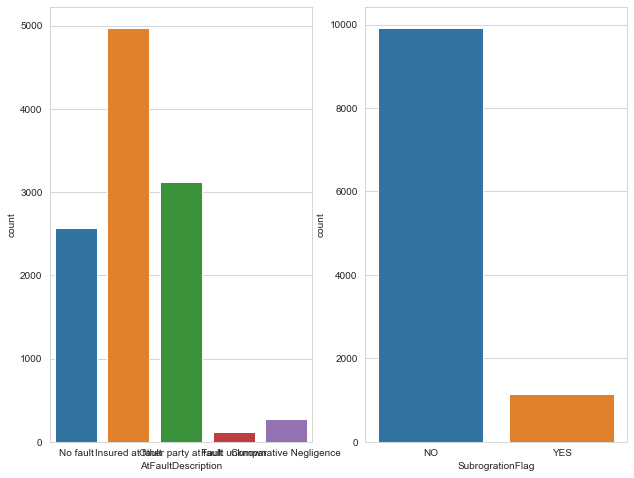

In [135]:
plt.figure(figsize = (16,8))
plt.subplot(131)
sns.countplot(data=df_TheGeneral, x='AtFaultDescription')
plt.subplot(132)
sns.countplot(data=df_TheGeneral, x='SubrogrationFlag')

In [136]:
dummies = pd.get_dummies(df_TheGeneral[['AtFaultDescription', 'SubrogrationFlag']]) 
dummies.head()

AtFaultDescription_Comparative Negligence  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   AtFaultDescription_Fault unknown  AtFaultDescription_Insured at fault  \
0                                 0                                    0   
1                                 0                                    1   
2                                 0                                    1   
3                                 0                                    0   
4                                 0                                    0   

   AtFaultDescription_No fault  AtFaultDescription_Other party at fault  \
0                            1                                        0   
1                            0                                        0   
2                            0                                        0   
3                            1                                        0   
4                            1                                        0   

   SubrogrationFlag_NO  SubrogrationFlag_YES  
0                    1                     0  
1                    1                     0  
2                    1                     0  
3                    0                     1  
4                    1                     0

In [137]:
df_TheGeneral = pd.concat([df_TheGeneral, dummies[['AtFaultDescription_Comparative Negligence', 'AtFaultDescription_Fault unknown', 'AtFaultDescription_Insured at fault', 
                                                     'AtFaultDescription_No fault', 'AtFaultDescription_Other party at fault', 'SubrogrationFlag_NO']]], axis = 1)
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PolicyNumber                               11069 non-null  object 
 1   DriverNumber                               11069 non-null  int64  
 2   DriverCount                                11069 non-null  int64  
 3   ClaimCount                                 11069 non-null  int64  
 4   TotalPaid                                  11069 non-null  int64  
 5   ClaimNumber                                11069 non-null  object 
 6   AtFaultDescription                         11069 non-null  object 
 7   ClaimStatus                                11069 non-null  object 
 8   ClaimType                                  11069 non-null  object 
 9   DriverID                                   11069 non-null  int64  
 10  LossState             

### Last remaining predictors to be deleted

In [138]:
df_TheGeneral['ClaimStatus'].value_counts()
#closed / open, too vague to have an effect and too skewed, will delete

C    10870
O      199
Name: ClaimStatus, dtype: int64

In [139]:
df_TheGeneral['ClaimType'].value_counts()
#label encode, or just get rid of it

PG_IVREARENDCV              1423
PG_COLLISIONINTERSECTION     854
PG_COLLISIONMERGE            833
PG_COLLISIONBACKING          796
FIXEDOBJCOLL                 726
                            ... 
PEDESTRIAN/FATALATIES          1
VNOP                           1
PG_UNLAWFULLY_PARKED           1
THEFTS                         1
DNOP                           1
Name: ClaimType, Length: 58, dtype: int64

In [140]:
df_TheGeneral['DriverID'].value_counts()
#unclear, going to remove

1     5753
2     1312
0     1289
98    1132
99     941
3      389
4      137
5       70
6       24
7       13
8        4
12       3
10       1
13       1
Name: DriverID, dtype: int64

In [141]:
df_TheGeneral['LossState'].value_counts()

OH    860
CA    834
PA    704
TN    689
FL    687
     ... 
VI      3
FM      2
MI      2
ON      2
HI      1
Name: LossState, Length: 54, dtype: int64

In [142]:
df_TheGeneral['PolicyStateCode'].value_counts()

OH    855
CA    804
TN    721
PA    716
FL    671
CO    659
IN    407
TX    384
GA    378
AZ    377
VA    343
RI    313
AL    281
DC    242
NC    221
SC    205
NV    179
MD    179
IL    164
LA    158
WA    146
OK    139
OR    134
WI    133
CT    122
AK    121
DE    118
UT    117
NY    117
VT    116
MN    113
MO    106
ND     95
MS     94
AR     91
IA     88
NM     87
NH     87
NE     86
WV     85
ME     83
KS     82
WY     76
MT     72
SD     70
KY     58
ID     55
Name: PolicyStateCode, dtype: int64

* For this classification, I'm going to remove state codes as opposed to keeping them and label encoding like last time. I think label encoding them might produce some overly complex or confusing results to interpret, so I want to see what happens when we remove them

In [143]:
df_TheGeneral = df_TheGeneral.drop(['ClaimStatus', 'PolicyStateCode', 'LossState', 'DriverID','DriverNumber','AtFaultDescription','PolicyNumber', 'ClaimNumber', 'ClaimType', 'SubrogrationFlag'], axis = 1)

### Missing Values corrections

In [144]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DriverCount                                11069 non-null  int64  
 1   ClaimCount                                 11069 non-null  int64  
 2   TotalPaid                                  11069 non-null  int64  
 3   VehicleID                                  11069 non-null  int64  
 4   ClaimTransCount                            9780 non-null   float64
 5   ClaimTransPaidLoss                         9780 non-null   float64
 6   DaysToClaim                                9780 non-null   float64
 7   AtFaultDescription_Comparative Negligence  11069 non-null  uint8  
 8   AtFaultDescription_Fault unknown           11069 non-null  uint8  
 9   AtFaultDescription_Insured at fault        11069 non-null  uint8  
 10  AtFaultDescription_No 

* As we have a fairly large dataset, we can afford to drop the rows that do not have ClaimTransCount, ClaimTransPaidLoss, and DaysToClaim values and see what our result is.

In [145]:
df_TheGeneral = df_TheGeneral.dropna()

In [146]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9780 entries, 0 to 11068
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DriverCount                                9780 non-null   int64  
 1   ClaimCount                                 9780 non-null   int64  
 2   TotalPaid                                  9780 non-null   int64  
 3   VehicleID                                  9780 non-null   int64  
 4   ClaimTransCount                            9780 non-null   float64
 5   ClaimTransPaidLoss                         9780 non-null   float64
 6   DaysToClaim                                9780 non-null   float64
 7   AtFaultDescription_Comparative Negligence  9780 non-null   uint8  
 8   AtFaultDescription_Fault unknown           9780 non-null   uint8  
 9   AtFaultDescription_Insured at fault        9780 non-null   uint8  
 10  AtFaultDescription_No f

* Since we have 9780 rows left, it would appear that all 3 predictors had the same missing data for each row, so we should be fine to keep our dataset as is. There are alternatives such as filling them with means, 0's, or medians, but in the absence of information about the predictors, I feel it's better to eliminate them instead of making assumptions

### Splitting into Training / Testing set

In [147]:
y = df_TheGeneral['TotalPaid'] # Separating a target variable
X = df_TheGeneral.drop('TotalPaid', axis = 1) # dropping the target variable to create the matrix of predictors X

In [148]:
y.value_counts()

1    5310
0    4470
Name: TotalPaid, dtype: int64

* A little bit more skewed because of our data cleaning, but this should still be fine. Perhaps it would be better to remove null values then do a median calculation next time.

In [149]:
#Create the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [150]:
# fit initial model
logistic = LogisticRegression(max_iter = 10000, random_state = 42)
logistic.fit(X_train, y_train)

# predict on the training data
log_pred_train = logistic.predict(X_train)
log_pred_test = logistic.predict(X_test)

# display the inital model scores for training data
accuracy_training = logistic.score(X_train, y_train)
accuracy_testing = logistic.score(X_test, y_test)

# display confusion matrix for testing data
print("Logistic Regression Model Training Data Confusion Matrix :")
print(confusion_matrix(y_train, log_pred_train)) 
print('The accuracy score for the training data is:', accuracy_training.round(3), "\n")
print("Logistic Regression Model Testing Data Confusion Matrix :")
print(confusion_matrix(y_test, log_pred_test)) 
print('The accuracy score for the testing data is:', accuracy_testing.round(3))

Logistic Regression Model Training Data Confusion Matrix :
[[3267  315]
 [ 467 3775]]
The accuracy score for the training data is: 0.9 

Logistic Regression Model Testing Data Confusion Matrix :
[[806  82]
 [133 935]]
The accuracy score for the testing data is: 0.89


In [151]:
log_intercept = logistic.intercept_ 
beta_0 = log_intercept

# extract log reg coefs
coef = logistic.coef_[0]
coef = np.array(coef)
df_coef = pd.DataFrame(coef)
df_coef = df_coef.T # transpose to match column names

# column names
names = X.columns
df_coef.columns = names
df_coef = df_coef.T # transpose for better view

# sort coefficients in ascending order
df_coef = df_coef.rename(columns = {0:'logregCV_coeff'})
df_coef = df_coef.sort_values('logregCV_coeff')
df_coef = df_coef.reset_index()
df_coef = df_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logregCV_coeff'})
df_coef

Variable_Names  logregCV_coeff
0         AtFaultDescription_Insured at fault   -1.519713e+00
1                 AtFaultDescription_No fault   -1.111827e+00
2     AtFaultDescription_Other party at fault   -7.336463e-01
3   AtFaultDescription_Comparative Negligence   -5.942024e-01
4                             ClaimTransCount   -3.695544e-02
5                                   VehicleID   -1.147453e-03
6            AtFaultDescription_Fault unknown    3.542490e-07
7                          ClaimTransPaidLoss    1.815116e-03
8                                 DaysToClaim    2.914590e-03
9                         SubrogrationFlag_NO    6.788429e-03
10                                DriverCount    2.689529e-02
11                                 ClaimCount    1.654479e+00

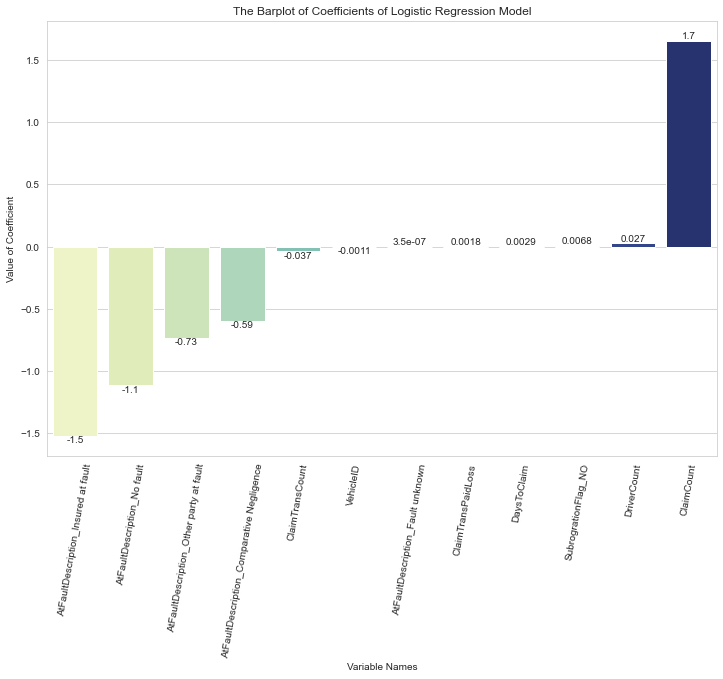

In [152]:
# display barplot of log reg coefs
plt.figure(figsize=(12, 8))
plot = sns.barplot(x="Variable_Names",y="logregCV_coeff",data= df_coef, palette ="YlGnBu")
plot.bar_label(plot.containers[0], fmt='%.2g')

plt.xticks(rotation=80)
plt.title('The Barplot of Coefficients of Logistic Regression Model')
plt.xlabel('Variable Names')
plt.ylabel('Value of Coefficient')
plt.show()

* There seem to be a few very important features, where ClaimCount increases our chance of a higher payment to a claimaint, and surprisingly being insured and at fault seems to decrease our risk

In [153]:
#Assess with the model

#report the accuracy score of the RF model on the test data
log_score = logistic.score(X_test, y_test)
score_format = 'Test Accuracy Score: {0:.4f}'.format(log_score)
print(score_format)
#report the recall score of the RF model on the test data
log_recall = recall_score(y_test, logistic.predict(X_test))
recall_format = 'Test Recall Score: {0:.4f}'.format(log_recall)
print(recall_format)
#report the precision score of the RF model on the test data
log_precision = precision_score(y_test, logistic.predict(X_test))
precision_format = 'Test Precision Score: {0:.4f}'.format(log_precision)
print(precision_format)

Test Accuracy Score: 0.8901
Test Recall Score: 0.8755
Test Precision Score: 0.9194


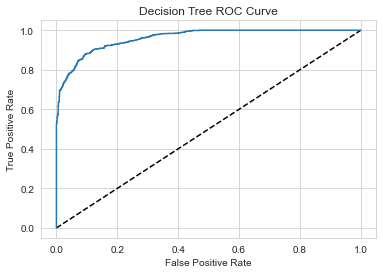

ROC AUC Score: 0.9611


In [154]:
# plot ROC curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict(X_test))

# roc auc score
log_roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(log_roc_auc)
print(roc_auc_format)

In [155]:
df_scores = pd.DataFrame({'Measures':['Accuracy','Sensitivity','Specificity','AUC'],'Logistic':[log_score,log_recall,log_precision,log_roc_auc]})
df_scores.head()

Measures  Logistic
0     Accuracy  0.890082
1  Sensitivity  0.875468
2  Specificity  0.919371
3          AUC  0.961145

In [156]:
# predict on the test data X_test
log_pred = logistic.predict(X_test)

# returns the probability for both class labels
logexport_prob = logistic.predict_proba(X_test) 

* We seem to have fairly strong results with Logistic Regression. Accuracy, Recall, and Precision are all fairly high. ROC curve is also incredibly high at 0.96. Since we have a large testing sample size, it is still expected that we'll have a large amount of incorrect predictions, but relative to the set not too badly. Let's see if we can do better with decision trees

## Decision Tree

In [157]:
decTree = DecisionTreeClassifier(random_state = 42)
decTree.fit(X_train, y_train)

decTree_score_test = decTree.score(X_test, y_test)
decTree_pred_test = decTree.predict(X_test)
precision_test = precision_score(y_test, decTree_pred_test)
recall_test = recall_score(y_test, decTree_pred_test)

print("Initial Decision Tree confusion matrix:")
print(confusion_matrix(y_test, decTree_pred_test), '\n')
print("Accuracy: ", decTree_score_test)
print("Sensitivity: ", recall_test)
print("Specificity: ", precision_test)

Initial Decision Tree confusion matrix:
[[794  94]
 [141 927]] 

Accuracy:  0.8798568507157464
Sensitivity:  0.8679775280898876
Specificity:  0.9079333986287953


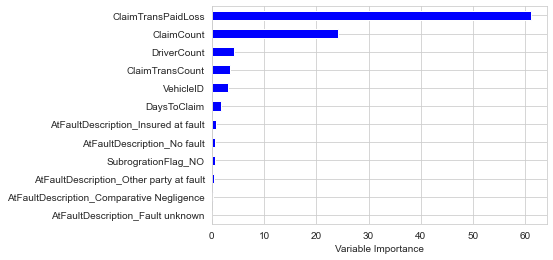

In [158]:
feat_imp = pd.DataFrame(decTree.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

Importance = pd.DataFrame({'Importance':decTree.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

* Interesting that while our initial score numbers are not too dissimilar from our Logistic Regression, the variable importance is significantly different. It seems to value less on categorical variables and more on numerical variables.

In [159]:
from sklearn.tree import plot_tree

In [160]:
# plot initial decision tree with max_depth = 5
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(36, 20), dpi=400)

plot_tree(decTree, 
          max_depth = 5,
          filled=True, 
          rounded=True,
          fontsize=14,
          proportion=False,
          class_names=["Low", "High"], 
          feature_names=X_train.columns.values); 

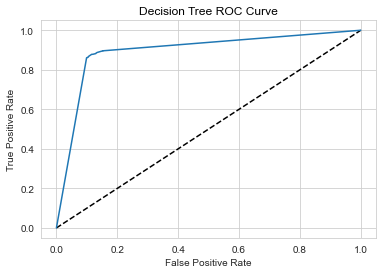

ROC AUC Score: 0.8931


In [161]:
# plot ROC curve
y_pred_prob = decTree.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, decTree_pred_test)

# roc auc score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)

In [162]:
df_decTree = pd.DataFrame(y_test)
df_decTree = df_decTree.reset_index()

df_decTree_pred = pd.DataFrame(decTree_pred_test)
df_decTree_pred = df_decTree_pred.rename(columns = {0:'Tree_Prediction'})

df_decTree = pd.concat([df_decTree, df_decTree_pred], axis = 1)
df_decTree.sample(10)

index  TotalPaid  Tree_Prediction
1482   1702          1                1
1285   7650          0                0
1764   6823          0                0
917    5858          1                0
161      99          1                1
1324   4895          0                0
1697   7178          0                0
952    5206          0                0
1863   9611          0                0
1553   6525          1                0

In [163]:
# use grid search cv to prune the decision tree
grid={"criterion": ['gini', 'entropy'], "max_depth" : [2, 3, 4, 5, 6],
      "max_leaf_nodes" : [2, 3, 4, 8, 9, 10],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}

model = DecisionTreeClassifier(random_state = 42)
model_gs=GridSearchCV(model,grid,cv=10)
model_gs.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",model_gs.best_params_)
print("accuracy :",model_gs.best_score_)

tuned hyperparameters :(best parameters)  {'class_weight': {0: 1, 1: 1.5}, 'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8}
accuracy : 0.9036285778679286


In [164]:
# fit new model with best parameters determined by gscv
decTree_gs = DecisionTreeClassifier(max_depth = 4, class_weight = {0:1, 1:1.5},  max_leaf_nodes = 8, criterion = 'gini',
                                 random_state = 42)
decTree_gs.fit(X_train, y_train)

decTree_score_test = decTree_gs.score(X_test, y_test)
decTree_pred_test = decTree_gs.predict(X_test)
precision_test = precision_score(y_test, decTree_pred_test)
recall_test = recall_score(y_test, decTree_pred_test)

print("Decision Tree confusion matrix:")
print(confusion_matrix(y_test, decTree_pred_test), '\n')
print("Accuracy: ", decTree_score_test)
print("Sensitivity: ", recall_test)
print("Specificity: ", precision_test)

Decision Tree confusion matrix:
[[790  98]
 [100 968]] 

Accuracy:  0.8987730061349694
Sensitivity:  0.9063670411985019
Specificity:  0.9080675422138836


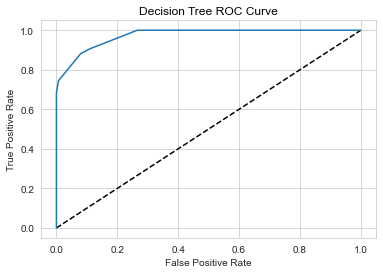

ROC AUC Score: 0.9739


In [165]:
# plot roc curve
y_pred_prob = decTree_gs.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, decTree_pred_test)

# roc auc score
dt_roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(dt_roc_auc)
print(roc_auc_format)

In [166]:
# plot decision tree
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(32, 20), dpi=400)

plot_tree(decTree_gs, 
          filled=True, 
          rounded=True,
          fontsize=14,
          proportion=False,
          class_names=["Low", "High"], 
          feature_names=X_train.columns.values); 

* A much simpler tree that is easier to read and understand, and helps us narrow down our predictions. As expected, the amount paid for claims that results in a loss is a big indicator in determining how much in total you are paying out.

In [167]:
df_scores['Decision Tree'] = [decTree_score_test,recall_test,precision_test,dt_roc_auc]

In [168]:
df_scores

Measures  Logistic  Decision Tree
0     Accuracy  0.890082       0.898773
1  Sensitivity  0.875468       0.906367
2  Specificity  0.919371       0.908068
3          AUC  0.961145       0.973898

* After pruning, our Decision Tree appears to produce slightly better results. A lower specificity, but the trade off is better sensitivity so we are dealing with less false negatives now. We can now look at Random Forest to see if we can get a better tree.

## Random Forest

In [169]:
#fit a random forest model onto the training data (all parameters predicting AHD) with 100 estimators and random state of 21
model_rf = RandomForestClassifier(n_estimators=100, random_state = 21)
model_rf.fit(X_train, y_train)
#use the RF model derived from the training data to predict on the testing data (all parameters predicting AHD)
model_rf_pred = model_rf.predict(X_test)

print(model_rf_pred)

[1 1 0 ... 1 0 0]


In [170]:
#create a dataframe of the predictions and show a random sample of the results it produces
model_pred = pd.DataFrame(model_rf_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Rf'})


display(model_pred.sample(5, random_state=244))

Predict_Rf
1339           1
1252           1
1235           1
506            1
705            1

In [171]:
#Assess with the model
ranFr_probab = model_rf.predict_proba(X_test)[:,1]
#report the accuracy score of the RF model on the test data
score = model_rf.score(X_test, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)
#report the recall score of the RF model on the test data
recall = recall_score(y_test, model_rf_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)
#report the precision score of the RF model on the test data
precision = precision_score(y_test, model_rf_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)
#roc score
roc = roc_auc_score(y_test, ranFr_probab)
roc_format = 'Roc_AUC_score: {0:.4f}'.format(roc)
print(roc_format)

Accuracy Score: 0.8865
Recall Score: 0.8848
Precision Score: 0.9052
Roc_AUC_score: 0.9713


In [172]:
df_scores['Base Random Forest'] = [score,recall,precision,roc]
df_scores

Measures  Logistic  Decision Tree  Base Random Forest
0     Accuracy  0.890082       0.898773            0.886503
1  Sensitivity  0.875468       0.906367            0.884831
2  Specificity  0.919371       0.908068            0.905172
3          AUC  0.961145       0.973898            0.971297

* Base random forest may not appear to be as strong with accuracy, but it still features great numbers across the board

In [173]:
#import libraries to further score the model
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
#define scoring method for the gridsearch that we will implement on our random forest a few blocks below
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'AUC': 'roc_auc'
}

In [174]:
#initialize a random forest model with random state 21
rf_model = RandomForestClassifier(random_state = 21)
#specify the range of criterion, number of estimators, max_depth of tree, and min_samples of the leaves the grid search will sort through 
param_grid_rf = [
    {"criterion": ['gini', 'entropy'],
    "n_estimators":[ 1000, 1500, 2000],
     "max_depth" :[ 4, 5, 6, 7, 8, 9],
     "min_samples_leaf":[2, 3, 4, 5, 8]
    }
]

In [175]:
#import the grid search
from sklearn.model_selection import GridSearchCV
#conduct the grid search on the model we initialized in the cell above and use 10-fold cross validations
gs_rf = GridSearchCV(rf_model, param_grid_rf, cv = 10, verbose=True, n_jobs=-1)
#name the best random forest model on the training data
best_rf = gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [176]:
best_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=2000, random_state=21)

In [177]:
rf_best = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=2000, random_state=21)

In [178]:
rf_best = rf_best.fit(X_train,y_train)

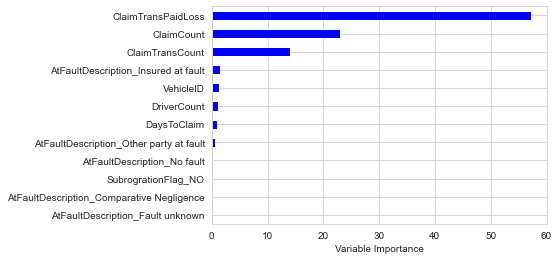

In [179]:
rf_best_pred = rf_best.predict(X_test)
feat_imp = pd.DataFrame(rf_best.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

Importance = pd.DataFrame({'Importance':rf_best.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [180]:
bestRf_probab = rf_best.predict_proba(X_test)[:,1]
#Assess with the model
score = rf_best.score(X_test, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, rf_best_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, rf_best_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

roc = roc_auc_score(y_test, bestRf_probab)
roc_format = 'Roc_AUC_score: {0:.4f}'.format(roc)
print(roc_format)

Accuracy Score: 0.8972
Recall Score: 0.8886
Precision Score: 0.9205
Roc_AUC_score: 0.9754


In [181]:
df_scores['Best Random Forest'] = [score,recall,precision,roc]
df_scores

Measures  Logistic  Decision Tree  Base Random Forest  \
0     Accuracy  0.890082       0.898773            0.886503   
1  Sensitivity  0.875468       0.906367            0.884831   
2  Specificity  0.919371       0.908068            0.905172   
3          AUC  0.961145       0.973898            0.971297   

   Best Random Forest  
0            0.897239  
1            0.888577  
2            0.920466  
3            0.975446

* Overall some very strong measures. It is interesting that we can determine what we want to prioritize in terms of scores when selecting the best model, not just going straight to best accuracy.

## Model Comparison

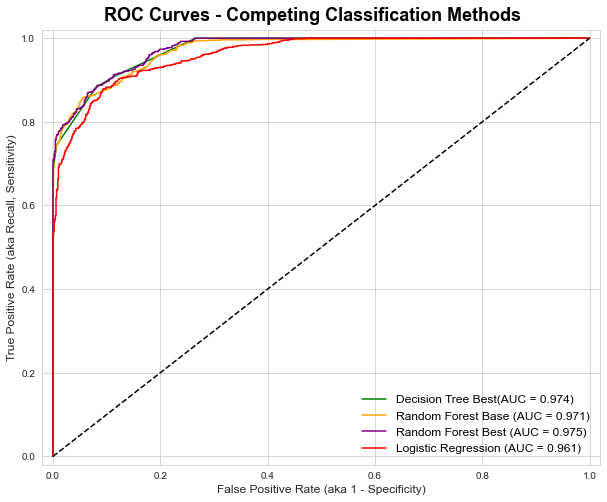

In [182]:
# Create Overall ROC Curve 
plt.figure(figsize = (10,8))
plt.suptitle('ROC Curves - Competing Classification Methods', fontweight='bold', fontsize=18, y=.92)

#logisitic regression model
lr_probab = logistic.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probab)
lr_auc = roc_auc_score(y_test, lr_probab)

#random forest base model
ranFr_probab = model_rf.predict_proba(X_test)[:,1]
ranFr_fpr, ranFr_tpr, ranFr_thresholds = roc_curve(y_test, ranFr_probab)
ranFr_auc = roc_auc_score(y_test, ranFr_probab)

#decision tree best model
dt_probab = decTree_gs.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probab)
dt_auc = roc_auc_score(y_test, dt_probab)


#random forest best model
bestRf_probab = rf_best.predict_proba(X_test)[:,1]
bestRf_fpr, bestRf_tpr, bestRf_thresholds = roc_curve(y_test, bestRf_probab)
bestRf_auc = roc_auc_score(y_test, bestRf_probab)


plt.plot(dt_fpr, dt_tpr, color='green',
         label='Decision Tree Best(AUC = {:.3f})'.format(dt_auc))
plt.plot(ranFr_fpr, ranFr_tpr, color='orange',
         label='Random Forest Base (AUC = {:.3f})'.format(ranFr_auc))
plt.plot(bestRf_fpr, bestRf_tpr, color='purple', 
         label='Random Forest Best (AUC = {:.3f})'.format(bestRf_auc))
plt.plot(lr_fpr, lr_tpr,color='red', 
         label='Logistic Regression (AUC = {:.3f})'.format(lr_auc))

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate (aka 1 - Specificity)', fontsize=12) 
plt.ylabel('True Positive Rate (aka Recall, Sensitivity)', fontsize=12)  
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.show()

* ROC curves are all strong with our models. There isn't a huge amount of separation between the 4, but logistic is a tiny bit lower than the rest of them.

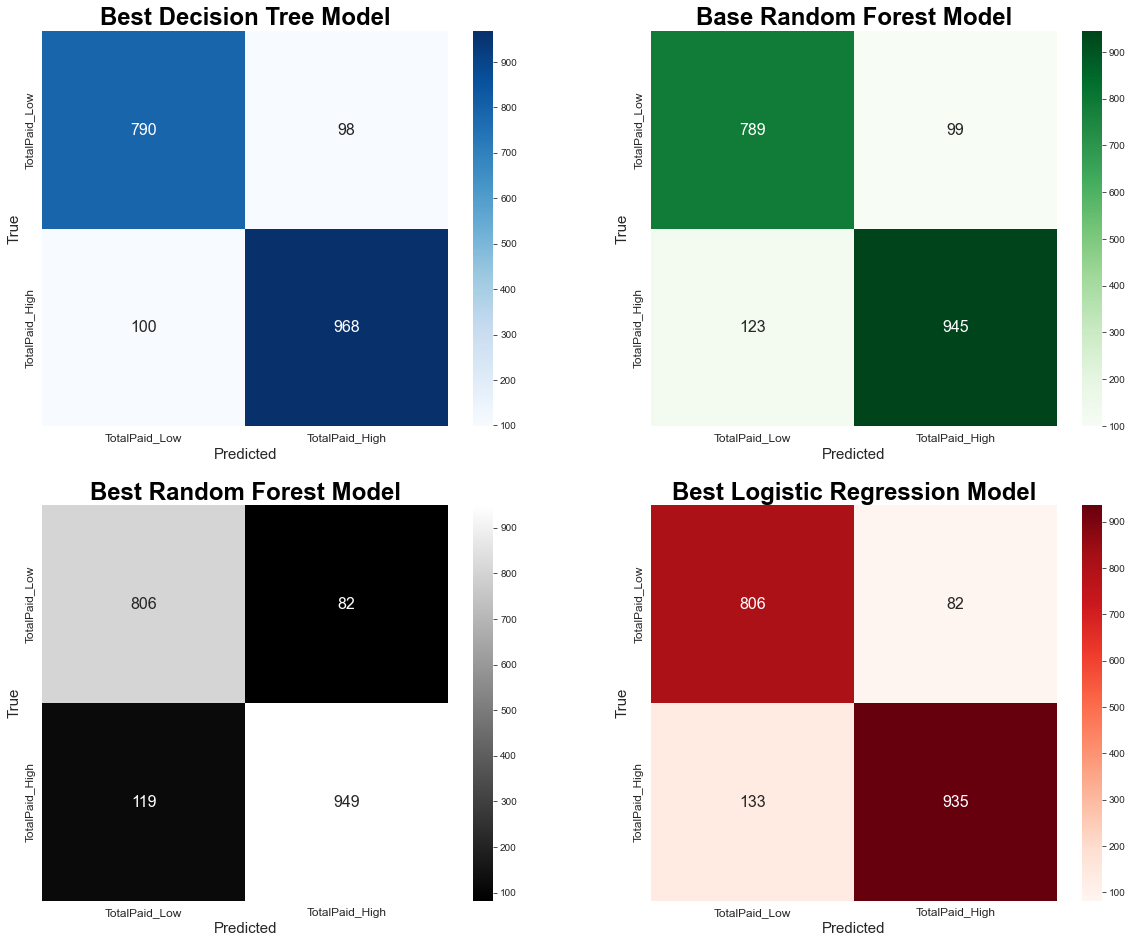

In [183]:
plt.figure(figsize=(20,16))


plt.subplot(221)
plt.title('Best Decision Tree Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
cm_dt = confusion_matrix(y_test, decTree_pred_test)
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12)
chart.yaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12, va='center')


plt.subplot(222)
plt.title('Base Random Forest Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
cm_rf = confusion_matrix(y_test, model_rf_pred)
chart = sns.heatmap(cm_rf, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12)
chart.yaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12, va='center')

plt.subplot(223)
plt.title('Best Random Forest Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
cm_Bestrf = confusion_matrix(y_test, rf_best_pred)
chart = sns.heatmap(cm_Bestrf, annot=True, cmap="gist_gray", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12)
chart.yaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12, va='center')


plt.subplot(224)
plt.title('Best Logistic Regression Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
cm_BestLr = confusion_matrix(y_test, log_pred)
chart = sns.heatmap(cm_BestLr, annot=True, cmap="Reds", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12)
chart.yaxis.set_ticklabels(['TotalPaid_Low', 'TotalPaid_High'], fontsize=12, va='center')
plt.show()

* There is a distinct difference between every single confusion matrix of our models here. It would seem that we can use a model to suit our needs instead of going straight to the highest accuracy. For instance, we may want to prioritize a higher sensititivty or specificity, which we could do instead of moving straight to the best Random Forest model.

In [184]:
X_names = pd.DataFrame(list(X.columns))

In [185]:
df_fi = pd.DataFrame(decTree_gs.feature_importances_)
df_fi

0
0   0.000000
1   0.377923
2   0.000000
3   0.000000
4   0.622077
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.000000
10  0.000000
11  0.000000

In [186]:
df_fi_rf = pd.DataFrame(model_rf.feature_importances_)

In [187]:
df_fi_bestRf = pd.DataFrame(rf_best.feature_importances_)

df_feat_imp = pd.concat([X_names, df_fi, df_fi_rf, df_fi_bestRf ], axis = 1)
df_feat_imp.columns = ['Features','DecTree_importance', 'RandFor_importance', 'BestRandFor_importance']
df_feat_imp

Features  DecTree_importance  \
0                                 DriverCount            0.000000   
1                                  ClaimCount            0.377923   
2                                   VehicleID            0.000000   
3                             ClaimTransCount            0.000000   
4                          ClaimTransPaidLoss            0.622077   
5                                 DaysToClaim            0.000000   
6   AtFaultDescription_Comparative Negligence            0.000000   
7            AtFaultDescription_Fault unknown            0.000000   
8         AtFaultDescription_Insured at fault            0.000000   
9                 AtFaultDescription_No fault            0.000000   
10    AtFaultDescription_Other party at fault            0.000000   
11                        SubrogrationFlag_NO            0.000000   

    RandFor_importance  BestRandFor_importance  
0             0.048722                0.011446  
1             0.203181                0.229294  
2             0.036038                0.012737  
3             0.146495                0.140491  
4             0.505409                0.571533  
5             0.023133                0.009164  
6             0.001775                0.000648  
7             0.000004                0.000000  
8             0.016846                0.014429  
9             0.005133                0.002974  
10            0.007678                0.005218  
11            0.005587                0.002066

In [188]:
#sorting features and removing any that do not have importance in any of the models
df_feat_imp[(df_feat_imp['DecTree_importance']!=0) | (df_feat_imp['RandFor_importance']!=0)| (df_feat_imp['BestRandFor_importance']!=0)].sort_values('BestRandFor_importance', ascending = False)

Features  DecTree_importance  \
4                          ClaimTransPaidLoss            0.622077   
1                                  ClaimCount            0.377923   
3                             ClaimTransCount            0.000000   
8         AtFaultDescription_Insured at fault            0.000000   
2                                   VehicleID            0.000000   
0                                 DriverCount            0.000000   
5                                 DaysToClaim            0.000000   
10    AtFaultDescription_Other party at fault            0.000000   
9                 AtFaultDescription_No fault            0.000000   
11                        SubrogrationFlag_NO            0.000000   
6   AtFaultDescription_Comparative Negligence            0.000000   
7            AtFaultDescription_Fault unknown            0.000000   

    RandFor_importance  BestRandFor_importance  
4             0.505409                0.571533  
1             0.203181                0.229294  
3             0.146495                0.140491  
8             0.016846                0.014429  
2             0.036038                0.012737  
0             0.048722                0.011446  
5             0.023133                0.009164  
10            0.007678                0.005218  
9             0.005133                0.002974  
11            0.005587                0.002066  
6             0.001775                0.000648  
7             0.000004                0.000000

* With our feature importance, we've shown how impactful ClaimsTransPaidLoss is, which makes sense as if the company is losing money on paying out a transaction, then there is a fairly high chance the total paid is also going to be on the higher side. ClaimCount is also an important variable, as it seems the higher the number claims, the more there poses a risk to paying out more on claims, which logically makese sense. The models seem to favor a few really strong predictors before considering the other predictors to be less than important. Overall we have pretty high accuracy, specificity, sensitivity, and ROC-AUC numbers, indicating we can use any of these models. At the end of the day our best random forrest model will be the highest in terms of raw numbers, but each model can fufill its own purpose if we want to look to optimize certain characteristics, such as ensuring greater High only predictions, greater specificity, etc....

* Our models may be fairly simple, but they do paint a good, accurate picture of assessing our target variable, TotalPaid to claims. With these models, we can feel pretty confident that we are able to assess whether TotalPaid will be high or not, indicating an area of risk for the insurance company. We may want to consider asking a different question in the future to better assess risk, but at the very least, we can confidently predict how TotalPaid will be.